# TGFb Vs CX5461 starburst plot

##  ***Load functions***

In [1]:
suppressMessages(suppressWarnings(source("./jupyter_common.R")))
#load('./rdata/jupyter_common.rdata')
load('./rdata/riboprof_170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna.rdata')
dim(df_all)

[1] 14577    31

# Common parameter

In [2]:
type <- "limma-voom.mrna"
level <- "htseq_gene"

rundate_appendix <- ".rdna_rn18s"
pattern_remove_gene <- NULL

th_adj_pvalue <- 0.05
th_log2fc <- log2(1.2)

list_genes <- list()
strdir <- type

dir_limma_output <- "out/limma-voom.mrna"
dir_rnaseq <- sprintf('./%s/170224.rdna_rn18s/NMuMG', dir_limma_output) 
dir_riboseq <- sprintf("./%s/161021.rdna_rn18s/NMuMG", dir_limma_output)

f_write_table <- FALSE
dir_rnaseq
dir_riboseq
strdir

[1] "./out/limma-voom.mrna/170224.rdna_rn18s/NMuMG"

[1] "./out/limma-voom.mrna/161021.rdna_rn18s/NMuMG"

[1] "limma-voom.mrna"

## Read GTF file

In [3]:
suppressMessages(suppressWarnings(library('rtracklayer')))
my_file <- "data/mouse/Mus_musculus.GRCm39.104.rdna_rn18s.gtf.gz"
show(my_file)
granges_gtf <- import(my_file)
head(granges_gtf)
length(granges_gtf)

[1] "data/mouse/Mus_musculus.GRCm39.104.rdna_rn18s.gtf.gz"


GRanges object with 6 ranges and 22 metadata columns:
      seqnames              ranges strand |   source       type     score
         <Rle>           <IRanges>  <Rle> | <factor>   <factor> <numeric>
  [1]        1 150956201-150958296      + |   havana gene              NA
  [2]        1 150956201-150958296      + |   havana transcript        NA
  [3]        1 150956201-150958296      + |   havana exon              NA
  [4]        1 150983666-150984611      + |   havana gene              NA
  [5]        1 150983666-150984611      + |   havana transcript        NA
  [6]        1 150983666-150984611      + |   havana exon              NA
          phase            gene_id gene_version   gene_name gene_source
      <integer>        <character>  <character> <character> <character>
  [1]      <NA> ENSMUSG00000102628            2     Gm37671      havana
  [2]      <NA> ENSMUSG00000102628            2     Gm37671      havana
  [3]      <NA> ENSMUSG00000102628            2     Gm37671      h

[1] 1866363

In [4]:
df_gtf0 <- as.data.frame(granges_gtf)
if (grepl("isoform", level)) {
    df_gtf <- df_gtf0[df_gtf0$type=='transcript',]
} else {
    df_gtf <- df_gtf0[df_gtf0$type=='gene',]
}
          
#head(df_gtf)
t(df_gtf[c(1,2,3),])
dim(df_gtf)

length(unique(df_gtf$gene_id))

gene_name <- unique(df_gtf$gene_name)
any(is.na(gene_name))
any(gene_name == 'NA')
any(nchar(gene_name)==0)
length(gene_name)

,1,4,7
seqnames,1,1,1
start,150956201,150983666,151012258
end,150958296,150984611,151013531
width,2096,946,1274
strand,+,+,+
source,havana,havana,havana
type,gene,gene,gene
score,NA,NA,NA
phase,NA,NA,NA
gene_id,ENSMUSG00000102628,ENSMUSG00000100595,ENSMUSG00000097426


[1] 55426    27

[1] 55426

[1] TRUE

[1] NA

[1] NA

[1] 52338

## Gene ID

In [5]:
length(unique(df_gtf$gene_id))

[1] 55426

In [6]:
f <- grepl('^ucsc', df_gtf$gene_id)
gene_id_ucsc <- unique(df_gtf$gene_id[f])
head(gene_id_ucsc)
length(gene_id_ucsc)

character(0)

[1] 0

In [7]:
length(setdiff(df_gtf$gene_id, gene_id_ucsc))

[1] 55426

## Gene name

In [8]:
length(unique(df_gtf$gene_name))

[1] 52338

In [9]:
f <- grepl('^ucsc', df_gtf$gene_name)
gene_name_ucsc <- unique(df_gtf$gene_name[f])
head(gene_name_ucsc)
length(gene_name_ucsc)

character(0)

[1] 0

In [10]:
length(setdiff(df_gtf$gene_name, gene_name_ucsc))

[1] 52338

## Gene biotype

In [11]:
f <- df_gtf$gene_biotype == 'protein_coding'
length(unique(df_gtf[f,'gene_name']))

[1] 21802

In [12]:
f <- df_gtf$gene_biotype == 'rRNA'
f <- f & !grepl("n-R5s", df_gtf$gene_name)
sort(unique(df_gtf[f,'gene_name']))

[1] "5_8S_rRNA"   "5S_rRNA"     "rDNA_Rn18s"  "rDNA_Rn28s"  "rDNA_Rn5-8s"
[6] "Rn18s"

# df_count_mrna

In [13]:
# Jake quick lysis totalRNA 

fname_in <- sprintf("%s/blancgrp_211613_RNAseq_total_stranded.counts.raw.txt.gz", dir_rnaseq)
verb('%s\n', fname_in)
df_count_mrna <- read.table(file=fname_in, 
                header=TRUE, sep="\t", row.names=1,
                quote="", comment.char="#", stringsAsFactors=F)

# add seqnames, start, end, witdth, strand, source
sym <- rownames(df_count_mrna)
if (grepl("isoform", level)) {
    idx <- match(rownames(df_count_mrna), df_gtf$transcript_name)
    df_count_mrna <- cbind(df_gtf[idx, 1:6], df_count_mrna)
    df_count_mrna$biotype <- df_gtf[idx, "transcript_biotype"]
    
} else {    
    idx <- match(rownames(df_count_mrna), df_gtf$gene_name)
    df_count_mrna <- cbind(df_gtf[idx, 1:6], df_count_mrna)    
    df_count_mrna$biotype <- df_gtf[idx, "gene_biotype"]
}

rownames(df_count_mrna) <- sym
head(df_count_mrna)

./out/limma-voom.mrna/170224.rdna_rn18s/NMuMG/blancgrp_211613_RNAseq_total_stranded.counts.raw.txt.gz


,seqnames,start,end,width,strand,source,JBQS001,JBQS002,JBQS003,JBQS004,JBQS005,JBQS006,JBQS007,JBQS008,JBQS009,biotype
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
rDNA_promoter,BK000964.3,45306,45446,141,+,stjude,0,0,0,0,0,0,0,0,0,rDNA
rDNA_promoter1,BK000964.3,1,141,141,+,stjude,0,0,0,0,0,0,0,0,0,rDNA
0610005C13Rik,7,45217218,45224751,7534,-,havana,1,0,0,1,0,0,0,0,0,lncRNA
0610006L08Rik,7,74468566,74503561,34996,-,havana,0,0,0,0,0,0,0,0,0,lncRNA
0610009B22Rik,11,51576213,51579701,3489,-,ensembl_havana,50,47,48,40,52,68,28,85,41,protein_coding
0610009E02Rik,2,26335708,26349402,13695,+,havana,8,7,6,2,2,4,3,4,3,lncRNA


# df_count_ribo

In [14]:
fname_in <- sprintf("%s/blancgrp_161021_Riboseq.counts.raw.txt.gz", dir_riboseq)
verb('%s\n', fname_in)
df_count_ribo <- read.table(file=fname_in, 
                header=TRUE, sep="\t", row.names=1,
                quote="", comment.char="#", stringsAsFactors=F)

sym <- rownames(df_count_ribo)
if (grepl("isoform", level)) {
    idx <- match(rownames(df_count_ribo), df_gtf$transcript_name)
    df_count_ribo <- cbind(df_gtf[idx, 1:6], df_count_ribo)
    df_count_ribo$biotype <- df_gtf[idx, "transcript_biotype"]
    
} else {    
    idx <- match(rownames(df_count_ribo), df_gtf$gene_name)
    df_count_ribo <- cbind(df_gtf[idx, 1:6], df_count_ribo)    
    df_count_ribo$biotype <- df_gtf[idx, "gene_biotype"]
}

rownames(df_count_ribo) <- sym
head(df_count_ribo)

./out/limma-voom.mrna/161021.rdna_rn18s/NMuMG/blancgrp_161021_Riboseq.counts.raw.txt.gz


,seqnames,start,end,width,strand,source,RD0175,RD0176,RD0177,RD0178,RD0179,RD0180,RD0184,RD0185,RD0186,biotype
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
rDNA_promoter,BK000964.3,45306,45446,141,+,stjude,0,0,0,0,0,0,0,0,0,rDNA
rDNA_promoter1,BK000964.3,1,141,141,+,stjude,0,0,0,0,0,0,0,0,0,rDNA
0610005C13Rik,7,45217218,45224751,7534,-,havana,0,0,0,0,0,0,0,0,0,lncRNA
0610006L08Rik,7,74468566,74503561,34996,-,havana,0,0,0,0,0,0,0,0,0,lncRNA
0610009B22Rik,11,51576213,51579701,3489,-,ensembl_havana,32,34,28,12,12,19,35,38,31,protein_coding
0610009E02Rik,2,26335708,26349402,13695,+,havana,0,0,0,0,0,1,0,0,0,lncRNA


## df_transcription

In [15]:
# Jake quick lysis totalRNA 
# log2cpm
fname_in <- sprintf("%s/blancgrp_211613_RNAseq_total_stranded.log2cpm.txt.gz", dir_rnaseq)
verb('%s\n', fname_in)
df_log2cpm <- read.table(file=fname_in, 
                header=TRUE, sep="\t", row.names=1,
                quote="", comment.char="#", stringsAsFactors=F)
colnames(df_log2cpm) <- c('unt.transcription','tgfb.transcription','tgfbCX5461.transcription')

if (!is.null(pattern_remove_gene)) {
  dim(df_log2cpm)
  df_log2cpm <- df_log2cpm[!grepl(pattern_remove_gene, rownames(df_log2cpm)),]
}
head(df_log2cpm)
dim(df_log2cpm)

fname_in <- sprintf("%s/blancgrp_211613_RNAseq_total_stranded.unt--vs--tgfb.all.txt.gz", dir_rnaseq)
verb('%s\n', fname_in)
df_mrna <- read.table(file=fname_in, 
                header=TRUE, sep="\t", row.names=1,
                quote="", comment.char="#", stringsAsFactors=F)
colnames(df_mrna) <- c('unt.transcription','tgfb.transcription',
                       'log2FCuntVStgfb.transcription','FDRuntVStgfb.transcription',
                       'PuntVStgfb.transcription')

if (!is.null(pattern_remove_gene)) {
  dim(df_mrna)
  df_mrna <- df_mrna[!grepl(pattern_remove_gene, rownames(df_mrna)),]
}
head(df_mrna)
dim(df_mrna)

fname_in <- sprintf("%s/blancgrp_211613_RNAseq_total_stranded.tgfb--vs--tgfbCX.all.txt.gz", dir_rnaseq)
verb('%s\n', fname_in)
df_mrna_cx <- read.table(file=fname_in, 
                header=TRUE, sep="\t", row.names=1,
                quote="", comment.char="#", stringsAsFactors=F)
colnames(df_mrna_cx) <- c('tgfb.transcription','tgfbCX5461.transcription',
                          'log2FCtgfbVStgfbCX5461.transcription','FDRtgfbVStgfbCX5461.transcription',
                          'PtgfbVStgfbCX5461.transcription')

if (!is.null(pattern_remove_gene)) {
  dim(df_mrna_cx)
  df_mrna_cx <- df_mrna_cx[!grepl(pattern_remove_gene, rownames(df_mrna_cx)),]
}
head(df_mrna_cx)
dim(df_mrna_cx)

# https://adairama.wordpress.com/2017/11/22/how-to-merge-multiple-datasets-in-r-based-on-row-names/
mylist <- list(df_log2cpm[,c('unt.transcription','tgfb.transcription','tgfbCX5461.transcription')],
                df_mrna[,c('log2FCuntVStgfb.transcription',
                           'FDRuntVStgfb.transcription',
                           'PuntVStgfb.transcription')],
                df_mrna_cx[,c('log2FCtgfbVStgfbCX5461.transcription',
                           'FDRtgfbVStgfbCX5461.transcription',
                           'PtgfbVStgfbCX5461.transcription')])
for(i in 1:length(mylist)){
  #colnames(mylist[[i]]) <- paste0( names(mylist)[i], "_", colnames(mylist[[i]]) )
  mylist[[i]]$ROWNAMES  <- rownames(mylist[[i]])
}
df_transcription <- plyr::join_all(mylist, by="ROWNAMES", type="full")
rownames(df_transcription) <- df_transcription$ROWNAMES; df_transcription$ROWNAMES <- NULL


df_transcription$unt.tgfb.DEtranscription <- 'notSig'
df_transcription$tgfb.tgfbCX5461.DEtranscription <- 'notSig'
df_transcription$reversible.transcription <- 'notSig'

f_up <- df_transcription$log2FCuntVStgfb.transcription > th_log2fc & df_transcription$FDRuntVStgfb.transcription < th_adj_pvalue
f_dn <- df_transcription$log2FCtgfbVStgfbCX5461.transcription < -th_log2fc & df_transcription$FDRtgfbVStgfbCX5461.transcription < th_adj_pvalue
df_transcription$unt.tgfb.DEtranscription[f_up] <- 'up'
df_transcription$tgfb.tgfbCX5461.DEtranscription[f_dn] <- 'down'
df_transcription$reversible.transcription[f_up & f_dn] <- 'upDown'

f_dn <- df_transcription$log2FCuntVStgfb.transcription < -th_log2fc & df_transcription$FDRuntVStgfb.transcription < th_adj_pvalue
f_up <- df_transcription$log2FCtgfbVStgfbCX5461.transcription > th_log2fc & df_transcription$FDRtgfbVStgfbCX5461.transcription < th_adj_pvalue
df_transcription$unt.tgfb.DEtranscription[f_dn] <- 'down'
df_transcription$tgfb.tgfbCX5461.DEtranscription[f_up] <- 'up'
df_transcription$reversible.transcription[f_dn & f_up] <- 'downUp'

#tail(df_transcription)
df_transcription[c('Abcc2'),]
dim(df_transcription)

./out/limma-voom.mrna/170224.rdna_rn18s/NMuMG/blancgrp_211613_RNAseq_total_stranded.log2cpm.txt.gz


,unt.transcription,tgfb.transcription,tgfbCX5461.transcription
,<dbl>,<dbl>,<dbl>
0610009B22Rik,-1.7361927,-1.77777696,-1.52337076
0610009E02Rik,-4.4542278,-5.89842646,-5.22659361
0610009L18Rik,-5.7348513,-5.04982074,-5.32317910
0610010F05Rik,-0.5443124,-0.18299550,-0.57995446
0610010K14Rik,-1.0822802,-1.73978964,-1.85796767
0610012G03Rik,0.1094487,0.09824498,0.09778162


[1] 13006     3

./out/limma-voom.mrna/170224.rdna_rn18s/NMuMG/blancgrp_211613_RNAseq_total_stranded.unt--vs--tgfb.all.txt.gz


,unt.transcription,tgfb.transcription,log2FCuntVStgfb.transcription,FDRuntVStgfb.transcription,PuntVStgfb.transcription
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4930402H24Rik,1.6107994,2.4726014,0.861802,0,0
Abcc2,-0.3106197,-3.8326160,-3.521996,0,0
Abcc3,1.8096731,0.6774089,-1.132264,0,0
Abcc4,2.6411045,1.0325850,-1.608520,0,0
Abcd3,1.8514176,0.3012823,-1.550135,0,0
Abhd17a,0.9001339,1.9114717,1.011338,0,0


[1] 13006     5

./out/limma-voom.mrna/170224.rdna_rn18s/NMuMG/blancgrp_211613_RNAseq_total_stranded.tgfb--vs--tgfbCX.all.txt.gz


,tgfb.transcription,tgfbCX5461.transcription,log2FCtgfbVStgfbCX5461.transcription,FDRtgfbVStgfbCX5461.transcription,PtgfbVStgfbCX5461.transcription
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ccng1,2.024061,3.005395,0.9813342,0e+00,0
Cdkn1a,1.201262,2.903427,1.7021649,0e+00,0
Ctsd,5.208313,5.777468,0.5691555,1e-11,0
Lce1g,2.005627,2.834313,0.8286863,1e-11,0
Slco2a1,2.261261,3.028303,0.7670417,3e-11,0
Itgb4,2.102091,2.894961,0.7928702,5e-11,0


[1] 13006     5

,unt.transcription,tgfb.transcription,tgfbCX5461.transcription,log2FCuntVStgfb.transcription,FDRuntVStgfb.transcription,PuntVStgfb.transcription,log2FCtgfbVStgfbCX5461.transcription,FDRtgfbVStgfbCX5461.transcription,PtgfbVStgfbCX5461.transcription,unt.tgfb.DEtranscription,tgfb.tgfbCX5461.DEtranscription,reversible.transcription
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Abcc2,-0.3106197,-3.832616,-3.871377,-3.521996,0,0,-0.03876149,0.9709617,0.9282336,down,notSig,notSig


[1] 13006    12

## df_translation

In [16]:
fname_in <- sprintf("%s/blancgrp_161021_Riboseq.log2cpm.txt.gz", dir_riboseq)

verb('%s\n', fname_in)
df_log2cpm <- read.table(file=fname_in, 
                header=TRUE, sep="\t", row.names=1,
                quote="", comment.char="#", stringsAsFactors=F)
colnames(df_log2cpm) <- c('unt.translation','tgfb.translation','tgfbCX5461.translation')

if (!is.null(pattern_remove_gene)) {
  dim(df_log2cpm)
  df_log2cpm <- df_log2cpm[!grepl(pattern_remove_gene, rownames(df_log2cpm)),]
}
head(df_log2cpm)
dim(df_log2cpm)

fname_in <- sprintf("%s/blancgrp_161021_Riboseq.unt48--vs--tgfb48.diff-all.txt.gz", dir_riboseq)
#file.exists(fname_in)
verb('%s\n', fname_in)
df_ribo <- read.table(file=fname_in, 
                header=TRUE, sep="\t", row.names=1,
                quote="", comment.char="#", stringsAsFactors=F)
colnames(df_ribo) <- c('unt.translation','tgfb.translation',
                       'log2FCuntVStgfb.translation','FDRuntVStgfb.translation',
                       'PuntVStgfb.translation')

if (!is.null(pattern_remove_gene)) {
  dim(df_ribo)
  df_ribo <- df_ribo[!grepl(pattern_remove_gene, rownames(df_ribo)),]
}
head(df_ribo)
dim(df_ribo)

fname_in <- sprintf("%s/blancgrp_161021_Riboseq.tgfb48--vs--tgfbCX5461.all.txt.gz", dir_riboseq)
verb('%s\n', fname_in)
df_ribo_cx <- read.table(file=fname_in, 
                header=TRUE, sep="\t", row.names=1,
                quote="", comment.char="#", stringsAsFactors=F)
colnames(df_ribo_cx) <- c('tgfb.translation','tgfbCX5461.translation',
                          'log2FCtgfbVStgfbCX5461.translation','FDRtgfbVStgfbCX5461.translation',
                          'PtgfbVStgfbCX5461.translation')

if (!is.null(pattern_remove_gene)) {
  dim(df_ribo_cx)
  df_ribo_cx <- df_ribo_cx[!grepl(pattern_remove_gene, rownames(df_ribo_cx)),]
}
getwd()
head(df_ribo_cx)
dim(df_ribo_cx)

# https://adairama.wordpress.com/2017/11/22/how-to-merge-multiple-datasets-in-r-based-on-row-names/
mylist <- list(df_log2cpm[,c('unt.translation','tgfb.translation','tgfbCX5461.translation')],
                df_ribo[,c('log2FCuntVStgfb.translation',
                           'FDRuntVStgfb.translation',
                           'PuntVStgfb.translation')],
                df_ribo_cx[,c('log2FCtgfbVStgfbCX5461.translation',
                           'FDRtgfbVStgfbCX5461.translation',
                           'PtgfbVStgfbCX5461.translation')])
for(i in 1:length(mylist)){
  #colnames(mylist[[i]]) <- paste0( names(mylist)[i], "_", colnames(mylist[[i]]) )
  mylist[[i]]$ROWNAMES  <- rownames(mylist[[i]])
}
df_translation <- plyr::join_all(mylist, by="ROWNAMES", type="full")
rownames(df_translation) <- df_translation$ROWNAMES; df_translation$ROWNAMES <- NULL

df_translation$unt.tgfb.DEtranslation <- 'notSig'
df_translation$tgfb.tgfbCX5461.DEtranslation <- 'notSig'
df_translation$reversible.translation <- 'notSig'

f_up <- df_translation$log2FCuntVStgfb.translation > th_log2fc & df_translation$FDRuntVStgfb.translation < th_adj_pvalue
f_dn <- df_translation$log2FCtgfbVStgfbCX5461.translation < -th_log2fc & df_translation$FDRtgfbVStgfbCX5461.translation < th_adj_pvalue
df_translation$unt.tgfb.DEtranslation[f_up] <- 'up'
df_translation$tgfb.tgfbCX5461.DEtranslation[f_dn] <- 'down'
df_translation$reversible.translation[f_up & f_dn] <- 'upDown'

f_dn <- df_translation$log2FCuntVStgfb.translation < -th_log2fc & df_translation$FDRuntVStgfb.translation < th_adj_pvalue
f_up <- df_translation$log2FCtgfbVStgfbCX5461.translation > th_log2fc & df_translation$FDRtgfbVStgfbCX5461.translation < th_adj_pvalue
df_translation$unt.tgfb.DEtranslation[f_dn] <- 'down'
df_translation$tgfb.tgfbCX5461.DEtranslation[f_up] <- 'up'
df_translation$reversible.translation[f_dn & f_up] <- 'downUp'

head(df_translation)
dim(df_translation)

./out/limma-voom.mrna/161021.rdna_rn18s/NMuMG/blancgrp_161021_Riboseq.log2cpm.txt.gz


,unt.translation,tgfb.translation,tgfbCX5461.translation
,<dbl>,<dbl>,<dbl>
0610009B22Rik,-0.1209301,-0.5623582,0.4593551
0610010F05Rik,-1.4390170,-1.1130376,-1.8999308
0610010K14Rik,-0.7062234,-2.1409318,-0.6268219
0610012G03Rik,0.2537944,-0.2992177,-0.2840107
0610040J01Rik,-2.6671038,-3.6173387,-3.7617905
1110002E22Rik,-1.7847344,-2.3942601,-5.1504356


[1] 11998     3

./out/limma-voom.mrna/161021.rdna_rn18s/NMuMG/blancgrp_161021_Riboseq.unt48--vs--tgfb48.diff-all.txt.gz


,unt.translation,tgfb.translation,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Akr1c19,1.2798329,-5.394223,-6.674056,3.231760e-06,1.19600e-07
Gm22973,0.4065654,-5.394223,-5.800788,2.505955e-04,1.79206e-05
Lgals4,4.0592875,-1.190004,-5.249291,0.000000e+00,0.00000e+00
Gm10076,1.6797900,-3.459413,-5.139203,6.104391e-04,5.02679e-05
Apoc2,-0.3649858,-5.394223,-5.029237,2.057103e-04,1.41371e-05
Ugt2b34,2.0156044,-2.992556,-5.008161,6.005600e-07,1.75000e-08


[1] 2603    5

./out/limma-voom.mrna/161021.rdna_rn18s/NMuMG/blancgrp_161021_Riboseq.tgfb48--vs--tgfbCX5461.all.txt.gz


[1] "C:/Users/nmishra/Desktop/Total RNAseq EMT/jupyter codes"

,tgfb.translation,tgfbCX5461.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Atf3,3.385307,5.081134,1.695826,0,0
Ccn2,7.709552,6.451640,-1.257912,0,0
Gm10616,5.937916,3.850963,-2.086953,0,0
Gm29371,5.548829,2.816191,-2.732638,0,0
Gm49450,2.970223,4.930980,1.960757,0,0
Krt8,7.227771,6.438771,-0.789000,0,0


[1] 11998     5

,unt.translation,tgfb.translation,tgfbCX5461.translation,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0610009B22Rik,-0.1209301,-0.5623582,0.4593551,NA,NA,NA,1.02171324,0.02919136,0.002929355,notSig,up,notSig
0610010F05Rik,-1.4390170,-1.1130376,-1.8999308,NA,NA,NA,-0.78689319,0.41800085,0.183428443,notSig,notSig,notSig
0610010K14Rik,-0.7062234,-2.1409318,-0.6268219,NA,NA,NA,1.51410985,0.07704533,0.012849451,notSig,notSig,notSig
0610012G03Rik,0.2537944,-0.2992177,-0.2840107,NA,NA,NA,0.01520704,0.98121037,0.964044006,notSig,notSig,notSig
0610040J01Rik,-2.6671038,-3.6173387,-3.7617905,NA,NA,NA,-0.14445185,0.95563779,0.908020836,notSig,notSig,notSig
1110002E22Rik,-1.7847344,-2.3942601,-5.1504356,NA,NA,NA,-2.75617555,0.17439999,0.043534588,notSig,notSig,notSig


[1] 11998    12

## df_all

In [17]:
df_all <- merge(df_transcription, df_translation, by = 0, all = T)
sym <- df_all$Row.names
rownames(df_all) <- sym
df_all$Row.names <- NULL

if (grepl("isoform", level)) {
    idx <- match(rownames(df_all), df_gtf$transcript_name)
    df_all <- cbind(df_gtf[idx, 1:6], df_all)
    df_all$biotype <- df_gtf[idx, "transcript_biotype"]
    
} else {    
    idx <- match(rownames(df_all), df_gtf$gene_name)
    df_all <- cbind(df_gtf[idx, 1:6], df_all)    
    df_all$biotype <- df_gtf[idx, "gene_biotype"]
}

rownames(df_all) <- sym

head(df_all)
dim(df_all)

,seqnames,start,end,width,strand,source,unt.transcription,tgfb.transcription,tgfbCX5461.transcription,log2FCuntVStgfb.transcription,...,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0610009B22Rik,11,51576213,51579701,3489,-,ensembl_havana,-1.7361927,-1.77777696,-1.52337076,-0.04158431,...,NA,NA,NA,1.02171324,0.02919136,0.002929355,notSig,up,notSig,protein_coding
0610009E02Rik,2,26335708,26349402,13695,+,havana,-4.4542278,-5.89842646,-5.22659361,-1.44419866,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,lncRNA
0610009L18Rik,11,120239504,120242016,2513,+,ensembl_havana,-5.7348513,-5.04982074,-5.32317910,0.68503055,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,lncRNA
0610010F05Rik,11,23514961,23583639,68679,-,ensembl_havana,-0.5443124,-0.18299550,-0.57995446,0.36131693,...,NA,NA,NA,-0.78689319,0.41800085,0.183428443,notSig,notSig,notSig,protein_coding
0610010K14Rik,11,70126032,70128740,2709,-,ensembl_havana,-1.0822802,-1.73978964,-1.85796767,-0.65750941,...,NA,NA,NA,1.51410985,0.07704533,0.012849451,notSig,notSig,notSig,protein_coding
0610012G03Rik,16,31765868,31767312,1445,-,havana,0.1094487,0.09824498,0.09778162,-0.01120375,...,NA,NA,NA,0.01520704,0.98121037,0.964044006,notSig,notSig,notSig,protein_coding


[1] 14577    31

## fix biotype

In [18]:
# Snord43 ENSMUSG00000105167 was annotated as miRNA 
idx <- which(rownames(df_all)=="Snord43")

if (length(idx)==1) {
    df_all[idx, "biotype"] <- "snoRNA"
}
idx

[1] 12114

# TFGb Vs CX5461

## detect gene symbol

### RNAseq detection

In [19]:
# TGFb Vs CX5461
fname_rnaseq <- sprintf("blancgrp_211613_RNAseq_total_stranded.tgfb--vs--tgfbCX.all.txt.gz")
df_rnaseq <- read.table(file=sprintf("%s/%s", dir_rnaseq, fname_rnaseq), 
                header=TRUE, sep="\t", row.names=1,
                quote="", comment.char="#", stringsAsFactors=F)

if (!is.null(pattern_remove_gene)) {
  dim(df_rnaseq)
  df_rnaseq <- df_rnaseq[!grepl(pattern_remove_gene, rownames(df_rnaseq)),]
}

# df_mrna$biotype
idx <- match(rownames(df_rnaseq), rownames(df_all))
any(is.na(idx)) # should be FALSE
df_rnaseq$biotype <- df_all[idx,'biotype']
biotype_rnaseq <- unique(df_rnaseq$biotype)
biotype_rnaseq

head(df_rnaseq)
dim(df_rnaseq)
sym_rnaseq <- rownames(df_rnaseq)
length(sym_rnaseq)

[1] FALSE

[1] "protein_coding"                     "lncRNA"                            
 [3] "rDNA"                               "processed_pseudogene"              
 [5] "transcribed_unitary_pseudogene"     "transcribed_processed_pseudogene"  
 [7] "TEC"                                "polymorphic_pseudogene"            
 [9] "misc_RNA"                           "snoRNA"                            
[11] "scaRNA"                             "unprocessed_pseudogene"            
[13] "transcribed_unprocessed_pseudogene" "snRNA"                             
[15] "TR_C_gene"                          "rRNA"                              
[17] "Mt_rRNA"                            "Mt_tRNA"                           
[19] "IG_C_gene"                          "miRNA"                             
[21] "ribozyme"                           "pseudogene"                        
[23] "translated_unprocessed_pseudogene"

,tgfb,tgfbCX,log2FC,FDR,p.value,biotype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Ccng1,2.024061,3.005395,0.9813342,0e+00,0,protein_coding
Cdkn1a,1.201262,2.903427,1.7021649,0e+00,0,protein_coding
Ctsd,5.208313,5.777468,0.5691555,1e-11,0,protein_coding
Lce1g,2.005627,2.834313,0.8286863,1e-11,0,protein_coding
Slco2a1,2.261261,3.028303,0.7670417,3e-11,0,protein_coding
Itgb4,2.102091,2.894961,0.7928702,5e-11,0,protein_coding


[1] 13006     6

[1] 13006

### Ribo-seq detection

In [20]:
# TGFb Vs CX5461
fname_riboseq <- sprintf("blancgrp_161021_Riboseq.tgfb48--vs--tgfbCX5461.all.txt.gz")
df_riboseq <- read.table(file=sprintf("%s/%s", dir_riboseq, fname_riboseq), 
                header=TRUE, sep="\t", row.names=1,
                quote="", comment.char="#", stringsAsFactors=F)

if (!is.null(pattern_remove_gene)) {
  dim(df_riboseq)
  df_riboseq <- df_riboseq[!grepl(pattern_remove_gene, rownames(df_riboseq)),]
}

# df_mrna$biotype
idx <- match(rownames(df_riboseq), rownames(df_all))
any(is.na(idx)) # should be FALSE
df_riboseq$biotype <- df_all[idx,'biotype']
biotype_riboseq <- unique(df_riboseq$biotype)
biotype_riboseq


head(df_riboseq)
dim(df_riboseq)
sym_riboseq <- rownames(df_riboseq)
length(sym_riboseq)
sym_riboseq <- unique(sym_riboseq)
length(sym_riboseq)

[1] FALSE

[1] "protein_coding"                     "TEC"                               
 [3] "lncRNA"                             "processed_pseudogene"              
 [5] "Mt_tRNA"                            "misc_RNA"                          
 [7] "ribozyme"                           "rRNA"                              
 [9] "miRNA"                              "transcribed_processed_pseudogene"  
[11] "snRNA"                              "snoRNA"                            
[13] "rDNA"                               "unprocessed_pseudogene"            
[15] "Mt_rRNA"                            "transcribed_unprocessed_pseudogene"
[17] "scaRNA"                             "IG_C_gene"                         
[19] "TR_V_gene"                          "polymorphic_pseudogene"            
[21] "transcribed_unitary_pseudogene"     "TR_C_gene"                         
[23] "pseudogene"

,tgfb48,tgfbCX5461,log2FC,FDR,p.value,biotype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Atf3,3.385307,5.081134,1.695826,0,0,protein_coding
Ccn2,7.709552,6.451640,-1.257912,0,0,protein_coding
Gm10616,5.937916,3.850963,-2.086953,0,0,TEC
Gm29371,5.548829,2.816191,-2.732638,0,0,lncRNA
Gm49450,2.970223,4.930980,1.960757,0,0,protein_coding
Krt8,7.227771,6.438771,-0.789000,0,0,protein_coding


[1] 11998     6

[1] 11998

[1] 11998

### Protein coding only

In [21]:
f <- grepl('^protein_coding$', df_riboseq$biotype)
df_ribo_wo_pseudo <- df_riboseq[f,]
head(df_ribo_wo_pseudo)
dim(df_ribo_wo_pseudo)

,tgfb48,tgfbCX5461,log2FC,FDR,p.value,biotype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Atf3,3.385307,5.081134,1.695826,0,0,protein_coding
Ccn2,7.709552,6.451640,-1.257912,0,0,protein_coding
Gm49450,2.970223,4.930980,1.960757,0,0,protein_coding
Krt8,7.227771,6.438771,-0.789000,0,0,protein_coding
mt-Co1,6.388669,5.226476,-1.162193,0,0,protein_coding
Myh9,5.899741,4.736843,-1.162897,0,0,protein_coding


[1] 9973    6

### sym_detect_both

In [22]:
sym_detected_both <- intersect(sym_rnaseq, sym_riboseq)
length(sym_detected_both)

[1] 10427

### sym_detected_rnaseq_only

In [23]:
sym_detected_rnaseq_only <- setdiff(sym_rnaseq, sym_riboseq)
length(sym_detected_rnaseq_only)

[1] 2579

### sym_detected_riboseq_only

In [24]:
sym_detected_riboseq_only <- setdiff(sym_riboseq, sym_rnaseq)
length(sym_detected_riboseq_only)

[1] 1571

## df_mrna

In [25]:
fname_mrna <- sprintf("blancgrp_211613_RNAseq_total_stranded.tgfb--vs--tgfbCX.all.txt.gz")
df_mrna <- read.table(file = sprintf("%s/%s", dir_rnaseq, fname_mrna), header = TRUE, 
    sep = "\t", row.names = 1, quote = "", comment.char = "#", stringsAsFactors = F)

if (!is.null(pattern_remove_gene)) {
    dim(df_mrna)
    df_mrna <- df_mrna[!grepl(pattern_remove_gene, rownames(df_mrna)), ]
}
head(df_mrna)
dim(df_mrna)

colnames(df_all)
idx <- which(df_all[, "unt.tgfb.DEtranscription"] != "notSig")
df_mrna <- df_mrna[rownames(df_all[idx, ]), ]

# df_mrna$biotype
idx <- match(rownames(df_mrna), rownames(df_all))
any(is.na(idx))  # should be FALSE
df_mrna$biotype <- df_all[idx, "biotype"]

head(df_mrna)
dim(df_mrna)

vec_log2FC <- df_mrna$log2FC
vec_fdr <- df_mrna$FDR

,tgfb,tgfbCX,log2FC,FDR,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ccng1,2.024061,3.005395,0.9813342,0e+00,0
Cdkn1a,1.201262,2.903427,1.7021649,0e+00,0
Ctsd,5.208313,5.777468,0.5691555,1e-11,0
Lce1g,2.005627,2.834313,0.8286863,1e-11,0
Slco2a1,2.261261,3.028303,0.7670417,3e-11,0
Itgb4,2.102091,2.894961,0.7928702,5e-11,0


[1] 13006     5

[1] "seqnames"                            
 [2] "start"                               
 [3] "end"                                 
 [4] "width"                               
 [5] "strand"                              
 [6] "source"                              
 [7] "unt.transcription"                   
 [8] "tgfb.transcription"                  
 [9] "tgfbCX5461.transcription"            
[10] "log2FCuntVStgfb.transcription"       
[11] "FDRuntVStgfb.transcription"          
[12] "PuntVStgfb.transcription"            
[13] "log2FCtgfbVStgfbCX5461.transcription"
[14] "FDRtgfbVStgfbCX5461.transcription"   
[15] "PtgfbVStgfbCX5461.transcription"     
[16] "unt.tgfb.DEtranscription"            
[17] "tgfb.tgfbCX5461.DEtranscription"     
[18] "reversible.transcription"            
[19] "unt.translation"                     
[20] "tgfb.translation"                    
[21] "tgfbCX5461.translation"              
[22] "log2FCuntVStgfb.translation"         
[23] "FDRuntVStgfb.translation"            
[24] "PuntVStgfb.translation"              
[25] "log2FCtgfbVStgfbCX5461.translation"  
[26] "FDRtgfbVStgfbCX5461.translation"     
[27] "PtgfbVStgfbCX5461.translation"       
[28] "unt.tgfb.DEtranslation"              
[29] "tgfb.tgfbCX5461.DEtranslation"       
[30] "reversible.translation"              
[31] "biotype"

[1] FALSE

,tgfb,tgfbCX,log2FC,FDR,p.value,biotype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0610009E02Rik,-5.8984265,-5.2265936,0.6718328,0.55977147,0.292009949,lncRNA
0610010F05Rik,-0.1829955,-0.5799545,-0.3969590,0.04148518,0.004344689,protein_coding
0610010K14Rik,-1.7397896,-1.8579677,-0.1181780,0.79854067,0.584691893,protein_coding
0610040J01Rik,-4.7394168,-3.7050215,1.0343953,0.16393562,0.034095484,protein_coding
1110002E22Rik,-0.3413013,-0.1778612,0.1634400,0.52467287,0.257096267,protein_coding
1110002L01Rik,-0.7176300,-0.2905577,0.4270723,0.03121272,0.002887045,lncRNA


[1] 6703    6

### sym_mrna_up

In [26]:
f_up <- (vec_fdr < th_adj_pvalue) & (vec_log2FC > th_log2fc)
df_mrna_up <- df_mrna[f_up,]
sym_mrna_up <- rownames(df_mrna_up)
dim(df_mrna_up)

list_genes[['sym_mrna_up']] <- sym_mrna_up

[1] 403   6

### sym_mrna_down

In [27]:
f_dn <- (vec_fdr < th_adj_pvalue) & (vec_log2FC < -th_log2fc)
df_mrna_dn <- df_mrna[f_dn,]
sym_mrna_dn <- rownames(df_mrna_dn)
dim(df_mrna_dn)

list_genes[['sym_mrna_dn']] <- sym_mrna_dn

[1] 420   6

### sym_mrna

In [28]:
sym_mrna <- union(sym_mrna_up, sym_mrna_dn)
length(sym_mrna)

df_mrna <- df_mrna[sym_mrna,,drop=F]

[1] 823

### sym_mrna_no

In [29]:
sym_mrna_no <- setdiff(sym_rnaseq, sym_mrna)
length(sym_mrna_no)

[1] 12183

### sym_mrna_de_detected_both

In [30]:
sym_mrna_de_detected_both <- intersect(sym_mrna, sym_detected_both)
length(sym_mrna_de_detected_both)

[1] 757

## df_ribo

In [31]:
fname_ribo <- sprintf("blancgrp_161021_Riboseq.unt48--vs--tgfb48.diff-all.txt.gz")
df_ribo <- read.table(file = sprintf("%s/%s", dir_riboseq, fname_ribo), header = TRUE, 
    sep = "\t", row.names = 1, quote = "", comment.char = "#", stringsAsFactors = F)

if (!is.null(pattern_remove_gene)) {
    dim(df_ribo)
    df_ribo <- df_ribo[!grepl(pattern_remove_gene, rownames(df_ribo)), ]
}
head(df_ribo)
dim(df_ribo)

idx <- which(df_all[, "unt.tgfb.DEtranslation"] != "notSig")
df_ribo <- df_ribo[rownames(df_all[idx, ]), ]

# df_mrna$biotype
idx <- match(rownames(df_ribo), rownames(df_all))
any(is.na(idx))  # should be FALSE
df_ribo$biotype <- df_all[idx, "biotype"]

head(df_ribo)
dim(df_ribo)


vec_log2FC <- df_ribo$log2FC
vec_fdr <- df_ribo$FDR

,unt48,tgfb48,log2FC,FDR,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Akr1c19,1.2798329,-5.394223,-6.674056,3.231760e-06,1.19600e-07
Gm22973,0.4065654,-5.394223,-5.800788,2.505955e-04,1.79206e-05
Lgals4,4.0592875,-1.190004,-5.249291,0.000000e+00,0.00000e+00
Gm10076,1.6797900,-3.459413,-5.139203,6.104391e-04,5.02679e-05
Apoc2,-0.3649858,-5.394223,-5.029237,2.057103e-04,1.41371e-05
Ugt2b34,2.0156044,-2.992556,-5.008161,6.005600e-07,1.75000e-08


[1] 2603    5

[1] FALSE

,unt48,tgfb48,log2FC,FDR,p.value,biotype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1110038B12Rik,2.6703556,2.3172192,-0.3531364,2.700556e-02,0.0049270853,lncRNA
1110059E24Rik,0.1306316,-0.8647351,-0.9953667,2.004643e-02,0.0034012561,protein_coding
1500011B03Rik,-0.6397620,-2.0752952,-1.4355331,2.352269e-02,0.0041348011,protein_coding
1700015I17Rik,-3.3048711,-1.0700091,2.2348621,8.306292e-03,0.0011381517,lncRNA
1700017B05Rik,0.9365901,2.0120754,1.0754853,1.137532e-05,0.0000004984,protein_coding
1700037H04Rik,0.1562650,-1.1485832,-1.3048481,1.614225e-02,0.0025791538,protein_coding


[1] 2603    6

### sym_ribo_up

In [32]:
f_up <- (vec_fdr < th_adj_pvalue) & (vec_log2FC > th_log2fc)
df_ribo_up <- df_ribo[f_up,]
sym_ribo_up <- rownames(df_ribo_up)
dim(df_ribo_up)

list_genes[['sym_ribo_up']] <- sym_ribo_up

[1] 1351    6

### sym_ribo_down

In [33]:
f_dn <- (vec_fdr < th_adj_pvalue) & (vec_log2FC < -th_log2fc)
df_ribo_dn <- df_ribo[f_dn,]
sym_ribo_dn <- rownames(df_ribo_dn)
dim(df_ribo_dn)

list_genes[['sym_ribo_dn']] <- sym_ribo_dn

[1] 1252    6

### sym_ribo

In [34]:
sym_ribo <- union(sym_ribo_up, sym_ribo_dn)
length(sym_ribo)

df_ribo <- df_ribo[sym_ribo,,drop=F]

[1] 2603

### sym_ribo_no

In [35]:
sym_ribo_no <- setdiff(sym_riboseq, sym_ribo)
length(sym_ribo_no)

[1] 9395

### sym_ribo_de_detected_both

In [36]:
sym_ribo_de_detected_both <- intersect(sym_ribo, sym_detected_both)
length(sym_ribo_de_detected_both)

[1] 2396

### biotype

In [37]:
unique(df_ribo$biotype)
length(which(df_ribo$biotype=='processed_pseudogene'))

[1] "lncRNA"                             "protein_coding"                    
 [3] "rRNA"                               "misc_RNA"                          
 [5] "transcribed_processed_pseudogene"   "polymorphic_pseudogene"            
 [7] "processed_pseudogene"               "unprocessed_pseudogene"            
 [9] "scaRNA"                             "snRNA"                             
[11] "snoRNA"                             "TEC"                               
[13] "IG_C_gene"                          "miRNA"                             
[15] "Mt_rRNA"                            "Mt_tRNA"                           
[17] "rDNA"                               "ribozyme"                          
[19] "TR_C_gene"                          "transcribed_unprocessed_pseudogene"

[1] 202

### protein_coding_only

In [38]:
f <- grepl('^protein_coding$', df_ribo$biotype)
df_ribo_wo_pseudo <- df_ribo[f,]
head(df_ribo_wo_pseudo)
dim(df_ribo_wo_pseudo)

,unt48,tgfb48,log2FC,FDR,p.value,biotype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1700017B05Rik,0.9365901,2.0120754,1.0754853,1.137532e-05,0.0000004984,protein_coding
4930402H24Rik,0.3611133,1.7281300,1.3670168,4.406850e-06,0.0000001697,protein_coding
9130019O22Rik,-4.6965296,-1.7175273,2.9790024,4.080761e-02,0.0083743560,protein_coding
9930111J21Rik1,-3.2764441,1.2721796,4.5486236,9.366500e-07,0.0000000297,protein_coding
9930111J21Rik2,-4.2238439,-0.4650922,3.7587516,1.088954e-03,0.0000991936,protein_coding
Abcf3,0.3664803,1.0211312,0.6546509,2.767077e-02,0.0050876573,protein_coding


[1] 2251    6

## shared between both rnaseq and riboseq

### sym_mrna_ribo_no

In [39]:
sym_mrna_ribo_no <- intersect(sym_mrna_no, sym_ribo_no)
length(sym_mrna_ribo_no)

[1] 7566

### sym_mrna_up_ribo_up

In [40]:
# detected in both platforms
sym_mrna_up_ribo_up <- intersect(sym_mrna_up, sym_ribo_up)
length(sym_mrna_up_ribo_up)

list_genes[['sym_mrna_up_ribo_up']] <- sym_mrna_up_ribo_up

[1] 114

### sym_mrna_dn_ribo_dn

In [41]:
# detected in both platforms
sym_mrna_dn_ribo_dn <- intersect(sym_mrna_dn, sym_ribo_dn)
length(sym_mrna_dn_ribo_dn)

list_genes[['sym_mrna_dn_ribo_dn']] <- sym_mrna_dn_ribo_dn

[1] 55

### sym_mrna_up_ribo_dn

In [42]:
# detected in both platforms
sym_mrna_up_ribo_dn <- intersect(sym_mrna_up, sym_ribo_dn)
sym_mrna_up_ribo_dn
length(sym_mrna_up_ribo_dn)

list_genes[['sym_mrna_up_ribo_dn']] <- sym_mrna_up_ribo_dn

[1] "Aldh3b1"   "Aldoa"     "Anapc13"   "Arl8a"     "Atf3"      "Bax"      
 [7] "Bbc3"      "Bcl2l1"    "Ccng1"     "Cdhr2"     "Cdkn1a"    "Chchd5"   
[13] "Coa3"      "Cystm1"    "Dcxr"      "Ddit3"     "Dusp1"     "Epha2"    
[19] "Ephx1"     "Epn1"      "Eps8l2"    "Ets2"      "Fgfbp1"    "Gaa"      
[25] "Gc"        "Gclc"      "Ggta1"     "Gprc5a"    "Gpx4"      "Gpx4-ps2" 
[31] "H2bc4"     "Igf2r"     "Itm2b"     "Krt19"     "Lgals2"    "Lgals9"   
[37] "Lmo7"      "Mdm2"      "Msln"      "Ndrg1"     "Perp"      "Phlda1"   
[43] "Plin3"     "Polr2e"    "Psrc1"     "Rassf7"    "Ripk4"     "Rnf213"   
[49] "Siva1"     "Slc19a2"   "Slc25a1"   "Slc39a4"   "Slc52a2"   "Slco2a1"  
[55] "Sord"      "Spint2"    "Sqstm1"    "Tinagl1"   "Tmbim4"    "Tmem171"  
[61] "Tmem176a"  "Trp53inp1" "Txnip"     "Uap1l1"    "Vegfb"     "Vil1"     
[67] "Vps37b"    "Zfp36l1"   "Zmat3"

[1] 69

### sym_mrna_dn_ribo_up

In [43]:
# detected in both platforms
sym_mrna_dn_ribo_up <- intersect(sym_mrna_dn, sym_ribo_up)
sym_mrna_dn_ribo_up
length(sym_mrna_dn_ribo_up)

list_genes[['sym_mrna_dn_ribo_up']] <- sym_mrna_dn_ribo_up

[1] "Adam12"   "Adarb1"   "Adgra1"   "Angptl2"  "Arid3a"   "Atp2b4"  
 [7] "Ckap4"    "Col1a1"   "Cp"       "Cpd"      "Csdc2"    "Ctsw"    
[13] "Daam1"    "Dennd5b"  "Denr"     "Erap1"    "Fanca"    "Fkbp5"   
[19] "Foxf2"    "Gldc"     "H2bc15"   "Il11"     "Kif4"     "Lgr6"    
[25] "Lmnb1"    "Marcks"   "Mcam"     "Mcm4"     "Mcm6"     "Nav1"    
[31] "Nrp2"     "Nt5e"     "Olfml2b"  "Paics"    "Pdgfrb"   "Pdia6"   
[37] "Ppa1"     "Pxdn"     "Rflnb"    "Ror1"     "Rrbp1"    "Rrm1"    
[43] "Serpinf1" "Smarcc1"  "Spcs3"    "Spp1"     "St3gal5"  "Stk3"    
[49] "Tagln"    "Tln2"     "Tmem119"  "Tyms"     "Ulbp1"    "Zfp36l2"

[1] 54

## transcription & translation total

In [44]:
length(sym_mrna)
length(sym_ribo)

# detected in both platforms
sym_mrna_de_ribo_de <- intersect(sym_mrna, sym_ribo)
length(sym_mrna_de_ribo_de)

[1] 823

[1] 2603

[1] 292

In [45]:
# detected in both platforms
length(sym_mrna_de_detected_both)
length(sym_ribo_de_detected_both)
sym_mrna_de_ribo_de <- intersect(sym_mrna_de_detected_both, sym_ribo_de_detected_both)
length(sym_mrna_de_ribo_de)

[1] 757

[1] 2396

[1] 292

### validation

In [46]:
length(sym_mrna_up_ribo_up) + length(sym_mrna_dn_ribo_dn) +
length(sym_mrna_up_ribo_dn) + length(sym_mrna_dn_ribo_up)

[1] 292

## df_mrna_only

In [47]:
sym_mrna_only <- setdiff(sym_mrna, sym_ribo)
length(sym_mrna_only)

# subsetting df_mrna
df_mrna_only <- df_mrna[sym_mrna_only,]
head(df_mrna_only)
dim(df_mrna_only)

[1] 531

,tgfb,tgfbCX,log2FC,FDR,p.value,biotype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1110002L01Rik,-0.7176300,-0.2905577,0.4270723,0.0312127218,0.0028870448,lncRNA
1810013L24Rik,1.2470260,1.5439815,0.2969555,0.0065956673,0.0003321669,protein_coding
2510039O18Rik,0.9820496,1.2884085,0.3063589,0.0124667183,0.0007706629,protein_coding
6330403L08Rik,-0.2687510,0.1286940,0.3974450,0.0193795845,0.0014276226,lncRNA
9030025P20Rik,-2.1175119,-1.4752304,0.6422814,0.0470695833,0.0052470017,protein_coding
9530053A07Rik,-2.6486490,-1.4373689,1.2112801,0.0001465024,0.0000025795,protein_coding


[1] 531   6

### check Ribo-seq FRD

In [48]:
f <- rownames(df_riboseq) %in% rownames(df_mrna_only)
head(df_riboseq[f,])

any(abs(df_riboseq[f,'log2FC']) > th_log2fc & df_riboseq[f,'FDR'] < th_adj_pvalue)

,tgfb48,tgfbCX5461,log2FC,FDR,p.value,biotype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Nuak2,6.326950,4.193520,-2.1334294,1.252200e-07,8.0000e-10,protein_coding
Ctsd,4.575188,5.192208,0.6170203,1.335870e-06,1.4100e-08,protein_coding
H4c2,3.141561,4.022108,0.8805477,7.173980e-06,1.0160e-07,protein_coding
H2ax,2.612105,1.419278,-1.1928263,1.682139e-05,2.5940e-07,protein_coding
Grina,2.160766,3.045025,0.8842591,5.887560e-05,1.1434e-06,protein_coding
H1f5,2.356463,1.176045,-1.1804185,7.444010e-05,1.5139e-06,protein_coding


[1] TRUE

In [49]:
vec_log2FC <- df_mrna_only$log2FC
vec_fdr <- df_mrna_only$FDR

### sym_mrna_up_ribo_no

In [50]:
f_up <- vec_fdr < th_adj_pvalue & vec_log2FC > th_log2fc
df_mrna_only_up <- df_mrna_only[f_up,]
sym_mrna_up_ribo_no <- rownames(df_mrna_only_up)
dim(df_mrna_only_up)

# detected in both platforms
sym_mrna_up_ribo_no <- intersect(sym_mrna_up_ribo_no, sym_detected_both)
length(sym_mrna_up_ribo_no)

list_genes[['sym_mrna_up_ribo_no']] <- sym_mrna_up_ribo_no

[1] 220   6

[1] 190

### sym_mrna_dn_ribo_no

In [51]:
f_dn <- vec_fdr < th_adj_pvalue & vec_log2FC < -th_log2fc
df_mrna_only_dn <- df_mrna_only[f_dn,]
sym_mrna_dn_ribo_no <- rownames(df_mrna_only_dn)
dim(df_mrna_only_dn)

# detected in both platforms
sym_mrna_dn_ribo_no <- intersect(sym_mrna_dn_ribo_no, sym_detected_both)
length(sym_mrna_dn_ribo_no)

list_genes[['sym_mrna_dn_ribo_no']] <- sym_mrna_dn_ribo_no

[1] 311   6

[1] 275

### sym_mrna_only (=sym_mrna_de_ribo_no)

In [52]:
# detected in both platforms
sym_mrna_de_ribo_no <- union(sym_mrna_up_ribo_no, sym_mrna_dn_ribo_no)
length(sym_mrna_de_ribo_no)

sym_mrna_only <- sym_mrna_de_ribo_no
length(sym_mrna_only)

df_mrna_only <- df_mrna[sym_mrna_only, ]

[1] 465

[1] 465

## df_ribo_only

In [53]:
sym_ribo_only <- setdiff(sym_ribo, sym_mrna)
length(sym_ribo_only)

if (!is.null(pattern_remove_gene)) {
  any(grepl(pattern_remove_gene, sym_ribo_only)) # should be FALSE
}

# subsetting df_ribo
df_ribo_only <- df_ribo[sym_ribo_only,]

head(df_ribo_only)
dim(df_ribo_only)

[1] 2311

,unt48,tgfb48,log2FC,FDR,p.value,biotype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1700015I17Rik,-3.3048711,-1.07000906,2.2348621,8.306292e-03,0.0011381517,lncRNA
2900060B14Rik,-1.4247999,-0.01341032,1.4113896,2.272762e-03,0.0002392481,lncRNA
4930402H24Rik,0.3611133,1.72813003,1.3670168,4.406850e-06,0.0000001697,protein_coding
4931419H13Rik,-1.7459926,-0.29323655,1.4527561,6.859988e-03,0.0008930906,lncRNA
5S_rRNA,10.5330843,11.39664485,0.8635606,1.277112e-02,0.0019380505,rRNA
7SK,0.6332460,1.59180049,0.9585545,2.133194e-04,0.0000147570,misc_RNA


[1] 2311    6

In [54]:
length(intersect(sym_ribo_only, sym_detected_both))

[1] 2104

In [55]:
vec_log2FC <- df_ribo_only$log2FC
vec_fdr <- df_ribo_only$FDR

### sym_mrna_no_ribo_up

In [56]:
f_up <- (vec_fdr < th_adj_pvalue) & (vec_log2FC > th_log2fc)
df_ribo_only_up <- df_ribo_only[f_up,]
sym_mrna_no_ribo_up <- rownames(df_ribo_only_up)
dim(df_ribo_only_up)

# detected in both platforms
sym_mrna_no_ribo_up <- intersect(sym_mrna_no_ribo_up, sym_detected_both)
length(sym_mrna_no_ribo_up)

list_genes[['sym_mrna_no_ribo_up']] <- sym_mrna_no_ribo_up

[1] 1183    6

[1] 1050

### sym_mrna_no_ribo_dn

In [57]:
f_dn <- (vec_fdr < th_adj_pvalue) & (vec_log2FC < -th_log2fc)
df_ribo_only_dn <- df_ribo_only[f_dn,]
sym_mrna_no_ribo_dn <- rownames(df_ribo_only_dn)
dim(df_ribo_only_dn)

# detected in both platforms
sym_mrna_no_ribo_dn <- intersect(sym_mrna_no_ribo_dn, sym_detected_both)
length(sym_mrna_no_ribo_dn)

list_genes[['sym_mrna_no_ribo_dn']] <- sym_mrna_no_ribo_dn

[1] 1128    6

[1] 1054

### sym_ribo_only (=sym_mrna_no_ribo_de)

In [58]:
# detected in both platforms
sym_mrna_no_ribo_de <- union(sym_mrna_no_ribo_up, sym_mrna_no_ribo_dn)
length(sym_mrna_no_ribo_de)

# here, sym_ribo_only was redefined.
# sym_ribo_only were detected in both platforms.
sym_ribo_only <- sym_mrna_no_ribo_de
length(sym_ribo_only)

df_ribo_only <- df_ribo[sym_ribo_only, ]

[1] 2104

[1] 2104

### biotype

In [59]:
unique(df_all$biotype)
f_pseudo <- grepl('pseudo', df_all$biotype)
sym_pseudo <- rownames(df_all[f_pseudo,])

length(setdiff(sym_mrna_no_ribo_up, sym_pseudo))
length(setdiff(sym_mrna_no_ribo_dn, sym_pseudo))

[1] "protein_coding"                     "lncRNA"                            
 [3] "TEC"                                "transcribed_unprocessed_pseudogene"
 [5] "transcribed_processed_pseudogene"   "rRNA"                              
 [7] "unprocessed_pseudogene"             "misc_RNA"                          
 [9] "translated_unprocessed_pseudogene"  "polymorphic_pseudogene"            
[11] "processed_pseudogene"               "snoRNA"                            
[13] "pseudogene"                         "transcribed_unitary_pseudogene"    
[15] "scaRNA"                             "snRNA"                             
[17] "miRNA"                              "IG_C_gene"                         
[19] "Mt_rRNA"                            "Mt_tRNA"                           
[21] "rDNA"                               "ribozyme"                          
[23] "TR_C_gene"                          "TR_V_gene"

[1] 1006

[1] 993

### no_DE

In [60]:
n_detected <- length(sym_detected_both)
n_detected

sym_de_both <- union(sym_mrna_de_detected_both, sym_ribo_de_detected_both)

sym_no_de_both <- setdiff(sym_detected_both, sym_de_both)
length(sym_no_de_both)

[1] 10427

[1] 7566

### validation

In [61]:
# de both & dectected in both platforms
intersect(sym_mrna_only, sym_mrna_de_ribo_de)
intersect(sym_ribo_only, sym_mrna_de_ribo_de)
sym_de <- union(sym_mrna_only, sym_ribo_only)
sym_de <- union(sym_de, sym_mrna_de_ribo_de)
n_de <- length(sym_de)
n_de

sym_no_de_both1 <- setdiff(sym_detected_both, sym_de)
length(sym_no_de_both1)

setequal(sym_no_de_both, sym_no_de_both1)

character(0)

character(0)

[1] 2861

[1] 7566

[1] TRUE

## common parameter

In [62]:
f_display_sym <- FALSE
seed_geom_text_repel <- 40

#biotype_exclude <- NULL
biotype_exclude <- "pseudogene"  # current choice of fig1
#biotype_exclude <- "protein_coding|pseudogene"

#biotype_include <- NULL
biotype_include <- "protein_coding"  # current choice of fig1

fname_appendix <- ""
if (!is.null(biotype_include)) {
    fname_appendix <- sprintf("_%s", gsub("\\|", "_", biotype_include))
} 
if (!is.null(biotype_exclude)) {
    fname_appendix <- sprintf("%s_wo_%s", fname_appendix, gsub("\\|", "_", biotype_exclude))
} 

fname_appendix

[1] "_protein_coding_wo_pseudogene"

In [63]:
if (!is.null(biotype_include)) {
    f <- grepl(biotype_include, df_all$biotype)
    df_include <- df_all[f, ]
    show(head(df_include))
    show(dim(df_include))
    include_genes <- rownames(df_include)
    
    sym_mrna_only <- intersect(sym_mrna_only, include_genes)
    sym_mrna_up_ribo_up <- intersect(sym_mrna_up_ribo_up, include_genes)
    sym_mrna_dn_ribo_dn <- intersect(sym_mrna_dn_ribo_dn, include_genes)
    sym_mrna_no_ribo_up <- intersect(sym_mrna_no_ribo_up, include_genes)
    sym_mrna_no_ribo_dn <- intersect(sym_mrna_no_ribo_dn, include_genes)
    sym_mrna_up_ribo_dn <- intersect(sym_mrna_up_ribo_dn, include_genes)
    sym_mrna_dn_ribo_up <- intersect(sym_mrna_dn_ribo_up, include_genes)    
}

              seqnames    start      end width strand         source
0610009B22Rik       11 51576213 51579701  3489      - ensembl_havana
0610010F05Rik       11 23514961 23583639 68679      - ensembl_havana
0610010K14Rik       11 70126032 70128740  2709      - ensembl_havana
0610012G03Rik       16 31765868 31767312  1445      -         havana
0610030E20Rik        6 72324300 72330131  5832      + ensembl_havana
0610040J01Rik        5 63969706 64056968 87263      + ensembl_havana
              unt.transcription tgfb.transcription tgfbCX5461.transcription
0610009B22Rik        -1.7361927        -1.77777696              -1.52337076
0610010F05Rik        -0.5443124        -0.18299550              -0.57995446
0610010K14Rik        -1.0822802        -1.73978964              -1.85796767
0610012G03Rik         0.1094487         0.09824498               0.09778162
0610030E20Rik        -0.7066802        -0.89024066              -0.91363548
0610040J01Rik        -1.1236084        -4.73941679           

## rpf_only_up_dn

In [64]:
df_fig <- df_all
sym <- rownames(df_fig)
df_fig$fig.type <- NA

verb("sym_mrna_only: %d\n", length(sym_mrna_only))
f <- sym %in% sym_mrna_only
str_mrna_only <- sprintf("RNA Only (n=%d)", length(sym_mrna_only))
df_fig[f, "fig.type"] <- str_mrna_only

verb("sym_mrna_up_ribo_up: %d\n", length(sym_mrna_up_ribo_up))
verb("sym_mrna_dn_ribo_dn: %d\n", length(sym_mrna_dn_ribo_dn))
f <- sym %in% sym_mrna_up_ribo_up | sym %in% sym_mrna_dn_ribo_dn
str_mrna_rpf <- sprintf("RNA and RPF (n=%d)", length(sym_mrna_up_ribo_up)+length(sym_mrna_dn_ribo_dn))
df_fig[f, "fig.type"] <- str_mrna_rpf

verb("sym_mrna_no_ribo_up: %d\n", length(sym_mrna_no_ribo_up))
f <- sym %in% sym_mrna_no_ribo_up
str_rpf_only_up <- sprintf("RPF Only - Up (n=%d)", length(sym_mrna_no_ribo_up))
df_fig[f, "fig.type"] <- str_rpf_only_up

verb("sym_mrna_no_ribo_dn: %d\n", length(sym_mrna_no_ribo_dn))
f <- sym %in% sym_mrna_no_ribo_dn
str_rpf_only_dn <- sprintf("RPF Only - Down (n=%d)", length(sym_mrna_no_ribo_dn))
df_fig[f, "fig.type"] <- str_rpf_only_dn
# verb('sym_no_de_both: %d\n',length(sym_no_de_both)); f <- sym %in%
# sym_no_de_both; df_fig[f, 'fig.type'] <- 'No DE'

f <- !is.na(df_fig$fig.type) & !is.na(df_fig$log2FCtgfbVStgfbCX5461.transcription) & 
    !is.na(df_fig$log2FCtgfbVStgfbCX5461.translation)
df_fig <- df_fig[f, ]
df_fig$fig.type <- factor(df_fig$fig.type, level = c(str_mrna_only, str_mrna_rpf, str_rpf_only_up, str_rpf_only_dn))
df_fig <- df_fig[order(df_fig$fig.type), ]

nv_color <- c('RNA Only'='#aaaaaa',
              'RNA and RPF'='#7aaa3d',
              'RPF Only - Up'='#d78c5e',
              'RPF Only - Down'='#fcf050')
names(nv_color) <- levels(df_fig$fig.type)

sym_mrna_only: 457
sym_mrna_up_ribo_up: 114
sym_mrna_dn_ribo_dn: 52
sym_mrna_no_ribo_up: 952
sym_mrna_no_ribo_dn: 982


,seqnames,start,end,width,strand,source,unt.transcription,tgfb.transcription,tgfbCX5461.transcription,log2FCuntVStgfb.transcription,...,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype,fig.type
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>
0610010F05Rik,11,23514961,23583639,68679,-,ensembl_havana,-0.5443124,-0.1829955,-0.5799545,0.3613169,...,NA,NA,-0.786893192,0.4180008464,0.1834284428,notSig,notSig,notSig,protein_coding,RNA Only (n=457)
1810013L24Rik,16,8647964,8676786,28823,+,ensembl_havana,0.9570812,1.2470260,1.5439815,0.2899448,...,NA,NA,0.888989100,0.0001134758,0.0000024969,notSig,up,notSig,protein_coding,RNA Only (n=457)
2510039O18Rik,4,148025352,148031771,6420,+,ensembl_havana,0.1081589,0.9820496,1.2884085,0.8738907,...,NA,NA,0.005385121,0.9931558420,0.9860253330,notSig,notSig,notSig,protein_coding,RNA Only (n=457)
3110082I17Rik,5,139345494,139446282,100789,-,ensembl_havana,-1.5814904,-1.1940075,-1.7329866,0.3874829,...,NA,NA,1.015035969,0.2697065841,0.0880502514,notSig,notSig,notSig,protein_coding,RNA Only (n=457)
9530053A07Rik,7,27828891,27864236,35346,+,ensembl_havana,-0.5843792,-2.6486490,-1.4373689,-2.0642698,...,NA,NA,0.932338693,0.4426091248,0.2036505670,notSig,notSig,notSig,protein_coding,RNA Only (n=457)
Aaas,15,102246687,102259206,12520,-,ensembl_havana,1.0503938,0.5298635,0.8885579,-0.5205303,...,NA,NA,0.351339617,0.4913063239,0.2463083463,notSig,notSig,notSig,protein_coding,RNA Only (n=457)


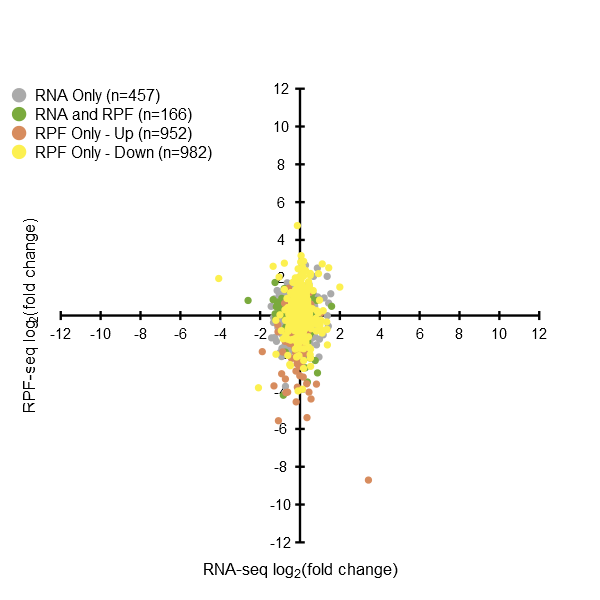

In [65]:
library(ggplot2)
nticks=13; xmax=12; ymax=12; gap_tick_label=4
gg <- ggplot(data=df_fig,
    aes(x=log2FCtgfbVStgfbCX5461.transcription, 
        y=log2FCtgfbVStgfbCX5461.translation, colour=fig.type)) + 
    theme_geometry(ticks=nticks, xlim=xmax, ylim=ymax, linesize=0.5, 
                   xlab=expression('RNA-seq log'[2]*'(fold change)'),
                   ylab=expression('RPF-seq log'[2]*'(fold change)'),
                   labsize=3.5, labgap=1.5, epsilon=max(xmax,ymax)/50, gap_tick_label=gap_tick_label) +
    geom_point(alpha=1, size=1) +
    theme(legend.title=element_blank(), 
          legend.text=element_text(size=9),
          legend.background = element_rect(color = NA),
          legend.key = element_rect(fill = "white", color = NA),
          legend.key.size = unit(0.4, "cm"),
          legend.key.width = unit(0,"cm"),
          #legend.spacing.y = unit(0.5, "cm"),          
          legend.position = c(0.02, 0.92), legend.justification = c(0, 1) ) +
    guides(colour = guide_legend(override.aes = list(size=3))) +
    ggtitle("") +
    scale_colour_manual(values = nv_color)

if (f_display_sym) {
    
  df_fig$sig <- 'no'; 
  df_fig$sym <- rownames(df_fig)  
  f_sym <- grepl('Malat', df_fig$sym)
    
  th_log2fc <- log2(1.2)
  th_adj_pvalue <- 0.05
  th_log2fc; th_adj_pvalue
    
  f_tgfb48_rnaseq_up_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCtgfbVStgfbCX5461.transcription > th_log2fc & df_fig$log2FCtgfbVStgfbCX5461.translation > th_log2fc
  f_tgfb48_rnaseq_dn_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCtgfbVStgfbCX5461.transcription < -th_log2fc & df_fig$log2FCtgfbVStgfbCX5461.translation > th_log2fc
  df_fig$sig[f_tgfb48_rnaseq_up_rpf_up & f_sym] <- 'up_up';
  df_fig$sig[f_tgfb48_rnaseq_up_rpf_up & f_sym] <- 'dn_up';
  #f <- grepl("Gm|Rik", df_fig$sym)
  #df_fig$sig[f] <- 'no'

  require('ggrepel')
  df_fig$nudge_x <- 0.2
  df_fig$nudge_x[f_tgfb48_rnaseq_up_rpf_up] <- -0.2 
  df_fig$nudge_y <- 0.2
  #f <- grepl("Malat1", df_fig$sym)
  #df_fig[f, 'nudge_x'] <- 0.4  
  #df_fig[f, 'nudge_y'] <- 0.4

  # change name
  df_fig$sym <- mgsub::mgsub(df_fig$sym,
        tolower(c('HALLMARK','_')), c('',' '))
  #df_fig$sym <- str_wrap(df_fig$sym, width=15)

  f <- df_fig$sig != 'no'
  if (any(f)) {
  df1 <- df_fig[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=sym, lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
  }
             
}

head(df_fig)
print_figure(gg, width=5, height=5,
    file=sprintf("scatter_plot.fig1 TGFb VS CX5461%s.rpf_only_up_dn", fname_appendix))

## Fig 1

In [66]:
df_fig <- df_all
sym <- rownames(df_fig)
df_fig$fig.type <- NA

verb("sym_mrna_only: %d\n", length(sym_mrna_only))
f <- sym %in% sym_mrna_only
str_mrna_only <- sprintf("RNA Only (n=%s)", format(length(sym_mrna_only), big.mark = ","))
df_fig[f, "fig.type"] <- str_mrna_only

verb("sym_mrna_up_ribo_dn: %d\n", length(sym_mrna_up_ribo_dn))
verb("sym_mrna_dn_ribo_up: %d\n", length(sym_mrna_dn_ribo_up))
f <- sym %in% sym_mrna_up_ribo_dn | sym %in% sym_mrna_dn_ribo_up
str_mrna_rpf_discord <- sprintf("RNA RPF Discord (n=%s)", format(length(sym_mrna_up_ribo_dn) + 
    length(sym_mrna_dn_ribo_up), big.mark = ","))
df_fig[f, "fig.type"] <- str_mrna_rpf_discord

verb("sym_mrna_up_ribo_up: %d\n", length(sym_mrna_up_ribo_up))
verb("sym_mrna_dn_ribo_dn: %d\n", length(sym_mrna_dn_ribo_dn))
f <- sym %in% sym_mrna_up_ribo_up | sym %in% sym_mrna_dn_ribo_dn
str_mrna_rpf <- sprintf("RNA and RPF (n=%s)", format(length(sym_mrna_up_ribo_up) + 
    length(sym_mrna_dn_ribo_dn), big.mark = ","))
df_fig[f, "fig.type"] <- str_mrna_rpf

verb("sym_mrna_no_ribo_up: %d\n", length(sym_mrna_no_ribo_up))
verb("sym_mrna_no_ribo_dn: %d\n", length(sym_mrna_no_ribo_dn))
f <- sym %in% sym_mrna_no_ribo_up | sym %in% sym_mrna_no_ribo_dn
str_rpf_only <- sprintf("RPF Only (n=%s)", format(length(sym_mrna_no_ribo_up) + length(sym_mrna_no_ribo_dn), 
    big.mark = ","))
df_fig[f, "fig.type"] <- str_rpf_only

f <- !is.na(df_fig$fig.type) & !is.na(df_fig$log2FCtgfbVStgfbCX5461.transcription) & 
    !is.na(df_fig$log2FCtgfbVStgfbCX5461.translation)
df_fig <- df_fig[f, ]
df_fig$fig.type <- factor(df_fig$fig.type, level = c(str_mrna_only, str_mrna_rpf_discord, 
    str_mrna_rpf, str_rpf_only))
df_fig <- df_fig[order(df_fig$fig.type), ]

nv_color <- c(`RNA Only` = "#aaaaaa", `RNA RPF Discord` = "#fcf050",
              `RNA and RPF` = "#7aaa3d", `RPF Only` = "#d78c5e")
names(nv_color) <- levels(df_fig$fig.type)

sym_mrna_only: 457
sym_mrna_up_ribo_dn: 68
sym_mrna_dn_ribo_up: 54
sym_mrna_up_ribo_up: 114
sym_mrna_dn_ribo_dn: 52
sym_mrna_no_ribo_up: 952
sym_mrna_no_ribo_dn: 982


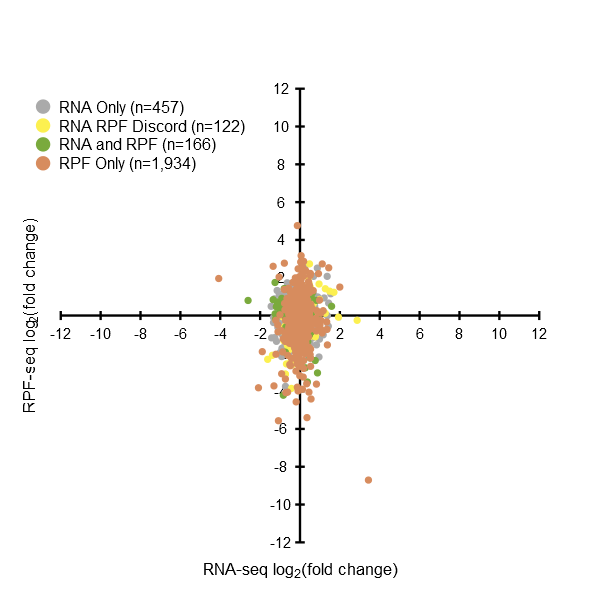

In [67]:
nticks=13; xmax=12; ymax=12; gap_tick_label=4
gg <- ggplot(data=df_fig,
    aes(x=log2FCtgfbVStgfbCX5461.transcription, 
        y=log2FCtgfbVStgfbCX5461.translation, colour=fig.type)) + 
    theme_geometry(ticks=nticks, xlim=xmax, ylim=ymax, linesize=0.5, 
                   xlab=expression('RNA-seq log'[2]*'(fold change)'),
                   ylab=expression('RPF-seq log'[2]*'(fold change)'),
                   labsize=3.5, labgap=1.5, epsilon=max(xmax,ymax)/50, gap_tick_label=gap_tick_label) +
    geom_point(alpha=1, size=1) +
    theme(legend.title=element_blank(), 
          legend.text=element_text(size=9),
          legend.background = element_rect(color = NA),
          legend.key = element_rect(fill = "white", color = NA),
          legend.key.size = unit(0.4, "cm"),
          legend.key.width = unit(0,"cm"),
          #legend.spacing.y = unit(0.5, "cm"),          
          legend.position = c(0.06, 0.9), legend.justification = c(0, 1) ) +
    guides(colour = guide_legend(override.aes = list(size=3))) +
    ggtitle("") +
    scale_colour_manual(values = nv_color)

if (f_display_sym) {
    
  df_fig$sig <- 'no'; 
  df_fig$sym <- rownames(df_fig)  
  # Snord43, Snora23, Snord83b, Snord17, Snord104  
  f_sym <- grepl('Malat|Snord43', df_fig$sym)
    
  th_log2fc <- log2(1.2)
  f_tgfb48_rnaseq_up_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCtgfbVStgfbCX5461.transcription > th_log2fc & df_fig$log2FCtgfbVStgfbCX5461.translation > th_log2fc
  f_tgfb48_rnaseq_dn_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCtgfbVStgfbCX5461.transcription < -th_log2fc & df_fig$log2FCtgfbVStgfbCX5461.translation > th_log2fc
  df_fig$sig[f_tgfb48_rnaseq_up_rpf_up & f_sym] <- 'up_up';
  df_fig$sig[f_tgfb48_rnaseq_dn_rpf_up & f_sym] <- 'dn_up';
  #f <- grepl("Gm|Rik", df_fig$sym)
  #df_fig$sig[f] <- 'no'

  require('ggrepel')
  df_fig$nudge_x <- 0.2
  df_fig$nudge_x[f_tgfb48_rnaseq_dn_rpf_up] <- -0.2 
  df_fig$nudge_y <- 0.2
  #f <- grepl("Malat1", df_fig$sym)
  #df_fig[f, 'nudge_x'] <- 0.4  
  #df_fig[f, 'nudge_y'] <- 0.4

  # change name
  df_fig$sym <- mgsub::mgsub(df_fig$sym,
        tolower(c('HALLMARK','_')), c('',' '))
  #df_fig$sym <- str_wrap(df_fig$sym, width=15)

  f <- df_fig$sig != 'no'
  if (any(f)) {
  df1 <- df_fig[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=sym, lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
  }
             
}

print_figure(gg, width=5, height=5,
             file=sprintf("scatter_plot.fig1 TGFb VS CX54611%s", fname_appendix))

# Gene Ontology (GO) analysis

## rna_only_up

In [68]:
condstr <- "sym_rna_only_up"

sym_rna_only_up <- intersect(sym_mrna_only, sym_mrna_up)
verb("sym_rna_only_up: %d\n", length(sym_rna_only_up))

sym_rna_only_up: 186


In [69]:
library(clusterProfiler)
library(DOSE)
library(msigdbr)
library(enrichplot)

#entrez.id <- unique(entrezdf$entrez_id[ match(sym_rna_only_up, entrezdf$gene_name) ])
gmt_mus.bp <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:BP") %>% 
  dplyr::select(gs_name, gene_symbol)

gmt_mus.cc <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:CC") %>% 
  dplyr::select(gs_name, gene_symbol)

gmt_mus.mf <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:MF") %>% 
  dplyr::select(gs_name, gene_symbol)
#head(gmt_mus)
set.seed(40)
em.bp <- enricher(sym_rna_only_up, TERM2GENE=gmt_mus.bp)
em.cc <- enricher(sym_rna_only_up, TERM2GENE=gmt_mus.cc)
em.mf <- enricher(sym_rna_only_up, TERM2GENE=gmt_mus.mf)
head(em.bp)
head(em.cc)
head(em.mf)
#egmt_rna_only_up <- enrichGO(sym_rna_only_up, org.Mm.eg.db=gmt_mus, ont='all', keyType = "gene_symbol",
#                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05,
#                minGSSize = 10, maxGSSize = 500)
#egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)

write.table(em.bp, file = sprintf('table/fig1. TGFB VS CX5461.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )


write.table(em.cc, file = sprintf('table/fig1. TGFB VS CX5461.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )


write.table(em.mf, file = sprintf('table/fig1. TGFB VS CX5461.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

Warning message:
"package 'DOSE' was built under R version 4.1.2"
DOSE v3.20.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609


Warning message:
"package 'msigdbr' was built under R version 4.1.1"


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_NEGATIVE_REGULATION_OF_GROWTH,GOBP_NEGATIVE_REGULATION_OF_GROWTH,GOBP_NEGATIVE_REGULATION_OF_GROWTH,12/160,234/16223,3.594494e-06,0.006973319,0.006632788,Apbb1/Bcl6/Cdk5/Dnajb2/Dusp10/Fgfr3/Flcn/G6pdx/Hyal2/Sema6b/Sertad3/Sesn2,12
GOBP_NEGATIVE_REGULATION_OF_CELL_GROWTH,GOBP_NEGATIVE_REGULATION_OF_CELL_GROWTH,GOBP_NEGATIVE_REGULATION_OF_CELL_GROWTH,10/160,184/16223,1.444245e-05,0.014009178,0.013325062,Apbb1/Bcl6/Cdk5/Dnajb2/Flcn/G6pdx/Hyal2/Sema6b/Sertad3/Sesn2,10
GOBP_REGULATION_OF_AUTOPHAGY,GOBP_REGULATION_OF_AUTOPHAGY,GOBP_REGULATION_OF_AUTOPHAGY,13/160,328/16223,2.267946e-05,0.014666048,0.013949854,Atp13a2/Atp6v0b/Atp6v0e/Cdk5/Ctsa/Dapk3/Flcn/Gpr137/Htra2/Sesn2/Ticam1/Tmem150a/Tsc2,13


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_VACUOLAR_MEMBRANE,GOCC_VACUOLAR_MEMBRANE,GOCC_VACUOLAR_MEMBRANE,14/125,428/13139,5.551814e-05,0.01260262,0.01215555,Atp13a2/Atp6v0b/Clcn7/Ctsa/Ctsd/Flcn/Gpr137/Marchf9/Mcoln1/Mfsd12/Napa/Pld3/Slc35f6/Tom1,14
GOCC_LYSOSOMAL_LUMEN,GOCC_LYSOSOMAL_LUMEN,GOCC_LYSOSOMAL_LUMEN,6/125,94/13139,2.702752e-04,0.03067624,0.02958803,Atp13a2/Ctsa/Ctsd/Pld3/Tcn2/Tpp1,6
GOCC_COSTAMERE,GOCC_COSTAMERE,GOCC_COSTAMERE,3/125,18/13139,6.179239e-04,0.04675624,0.04509760,Ahnak2/Flnc/Plec,3


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_NUCLEOSIDE_TRIPHOSPHATASE_REGULATOR_ACTIVITY,GOMF_NUCLEOSIDE_TRIPHOSPHATASE_REGULATOR_ACTIVITY,GOMF_NUCLEOSIDE_TRIPHOSPHATASE_REGULATOR_ACTIVITY,17/150,479/14695,7.920279e-06,0.002700815,0.002601186,Arhgef16/Arhgef28/Bag2/Dnajb2/Dnajb6/Eif2b2/Flcn/Llgl2/Nucb1/Rab3a/Rab4a/Sesn2/Sgsm2/Sh3bp5l/Tbc1d17/Tbc1d2/Tsc2,17
GOMF_ATPASE_REGULATOR_ACTIVITY,GOMF_ATPASE_REGULATOR_ACTIVITY,GOMF_ATPASE_REGULATOR_ACTIVITY,5/150,45/14695,9.113346e-05,0.014879573,0.014330689,Bag2/Dnajb2/Dnajb6/Rab3a/Rab4a,5
GOMF_ATPASE_ACTIVATOR_ACTIVITY,GOMF_ATPASE_ACTIVATOR_ACTIVITY,GOMF_ATPASE_ACTIVATOR_ACTIVITY,4/150,26/14695,1.309053e-04,0.014879573,0.014330689,Dnajb2/Dnajb6/Rab3a/Rab4a,4


## dotplot

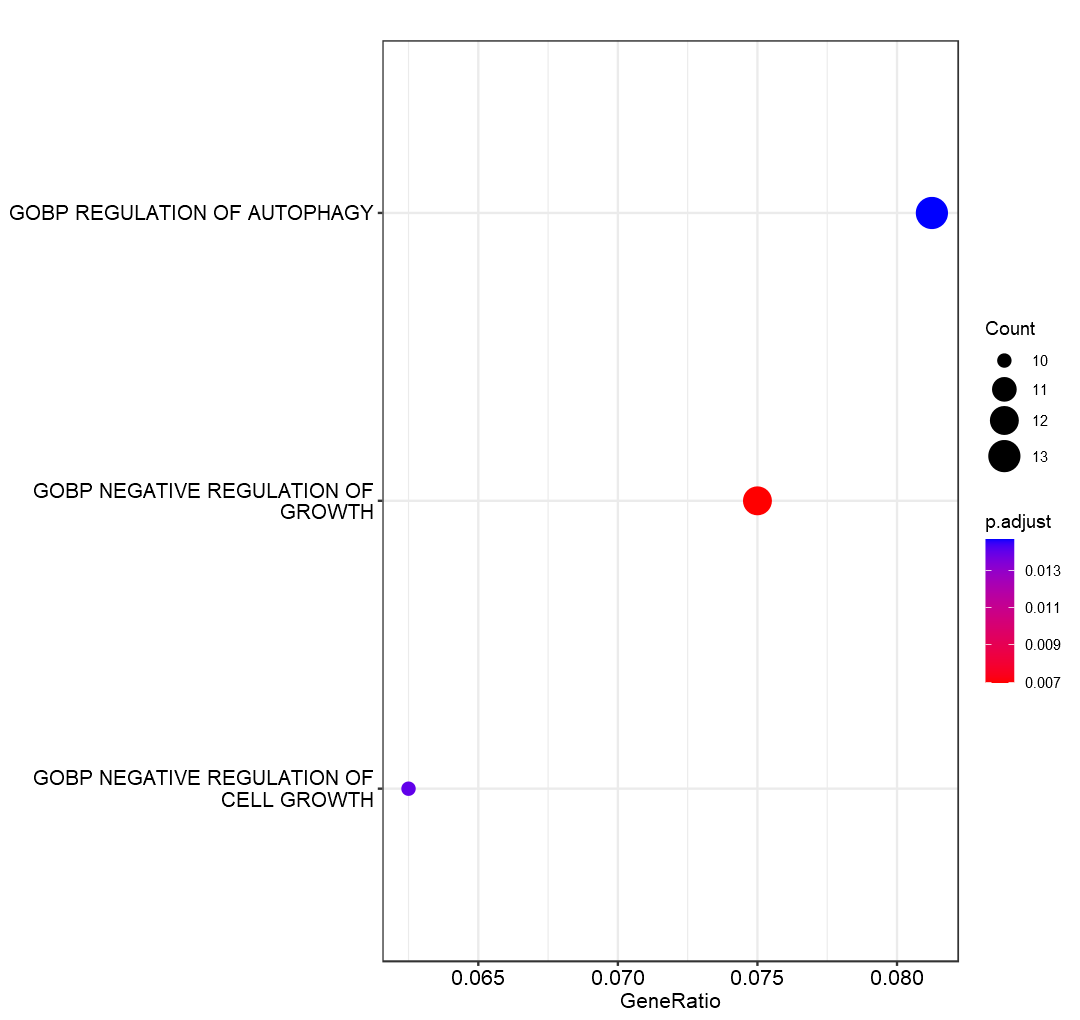

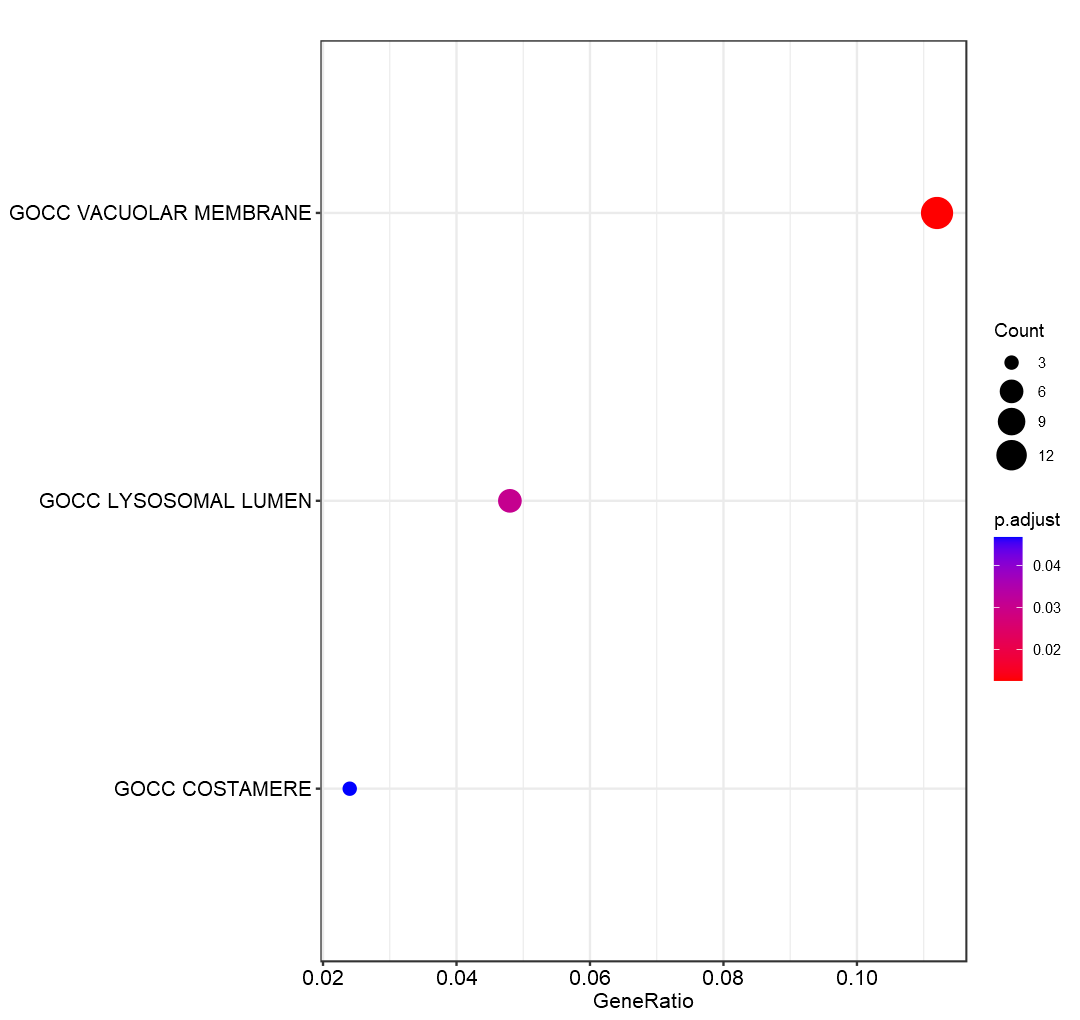

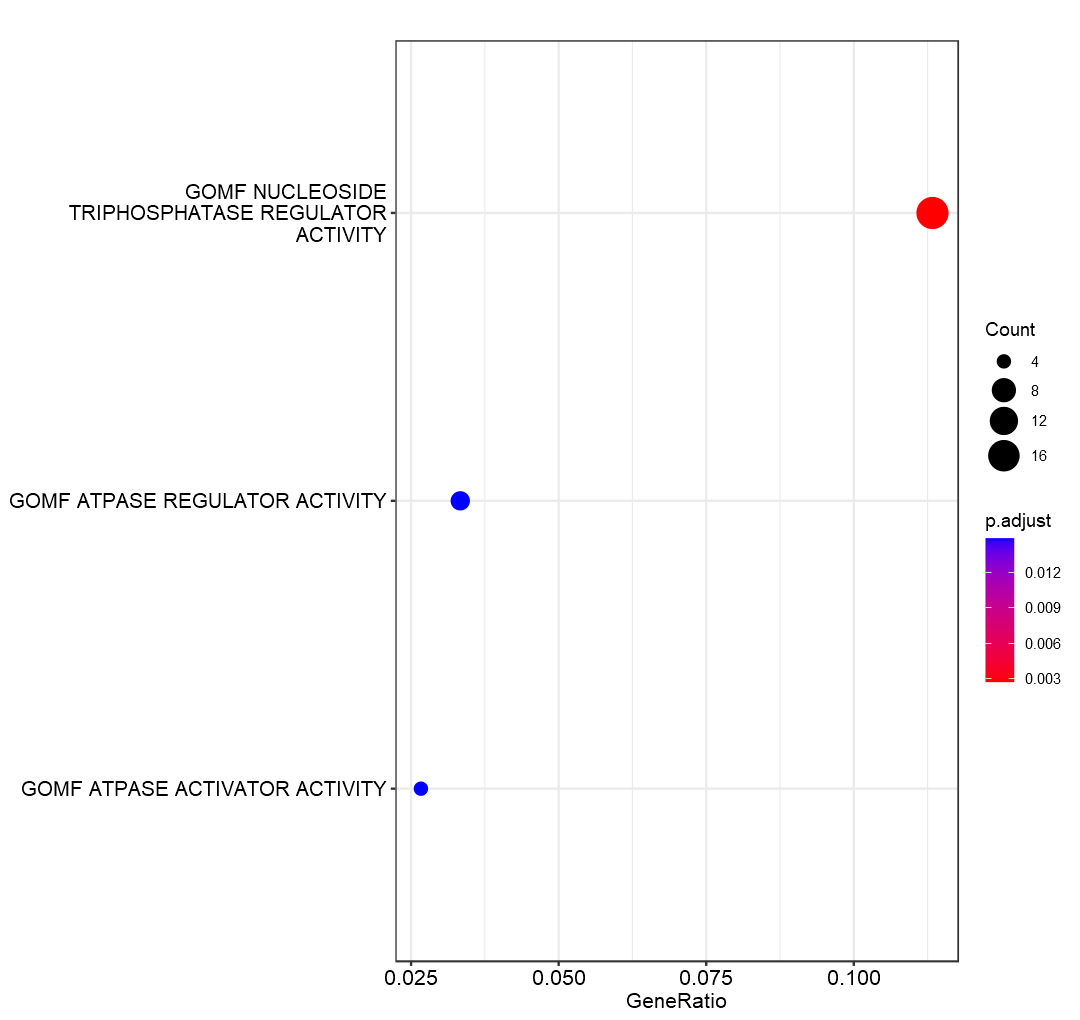

In [70]:
n_top_egmt <- 10
gg <- dotplot(em.bp, showCategory=n_top_egmt)
#gg <- dotplot(em, x = "GeneRatio",
#        color = "p.adjust", showCategory = n_top_egmt, split = "ONTOLOGY", font.size = 11,
#        title = "RNA Only Up") + facet_grid(ONTOLOGY~., scale="free")

print_figure(gg, width=9, height=8.5,
    file=sprintf("TGFb VS CX5461.dotplot.%s.enricher.go_top_BP%d", condstr, n_top_egmt))


gg <- dotplot(em.cc, showCategory=n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGFb VS CX5461.dotplot.%s.enricher.go_top_CC%d", condstr, n_top_egmt))

gg <- dotplot(em.mf, showCategory=n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGFb VS CX5461.dotplot.%s.enricher.go_top_MF%d", condstr, n_top_egmt))

## rna_only_down

In [71]:
condstr <- "sym_rna_only_dn"

sym_rna_only_dn <- intersect(sym_mrna_only, sym_mrna_dn)
verb("sym_rna_only_dn: %d\n", length(sym_rna_only_dn))

sym_rna_only_dn: 271


In [72]:
library(clusterProfiler)
library(DOSE)

gmt_mus.bp <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:BP") %>% 
  dplyr::select(gs_name, gene_symbol)

gmt_mus.cc <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:CC") %>% 
  dplyr::select(gs_name, gene_symbol)

gmt_mus.mf <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:MF") %>% 
  dplyr::select(gs_name, gene_symbol)
#head(gmt_mus)
set.seed(40)
em.bp <- enricher(sym_rna_only_dn, TERM2GENE=gmt_mus.bp)
em.cc <- enricher(sym_rna_only_dn, TERM2GENE=gmt_mus.cc)
em.mf <- enricher(sym_rna_only_dn, TERM2GENE=gmt_mus.mf)
head(em.bp)
head(em.cc)
head(em.mf)
#egmt_rna_only_up <- enrichGO(sym_rna_only_up, org.Mm.eg.db=gmt_mus, ont='all', keyType = "gene_symbol",
#                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05,
#                minGSSize = 10, maxGSSize = 500)
#egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)

write.table(em.bp, file = sprintf('table/fig1. TGFB VS CX5461.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )


write.table(em.cc, file = sprintf('table/fig1.TGFB VS CX5461.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )


write.table(em.mf, file = sprintf('table/fig1.TGFB VS CX5461.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_MITOTIC_NUCLEAR_DIVISION,GOBP_MITOTIC_NUCLEAR_DIVISION,GOBP_MITOTIC_NUCLEAR_DIVISION,49/253,291/16223,1.245350e-36,2.524325e-33,2.177396e-33,Anapc5/Anln/Aurkb/Bub1b/Ccnb2/Cdc25c/Cdca8/Cdk1/Cenpe/Cenpf/Chek2/Espl1/Fbxo5/Incenp/Kif11/Kif20b/Kif22/Kif2c/Knstrn/Kntc1/Mad2l1/Mki67/Mtbp/Mybl2/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ndc80/Nek2/Nusap1/Plk1/Prc1/Pttg1/Racgap1/Rad21/Sgo1/Sgo2a/Smc1a/Smc2/Smc3/Smc4/Spag5/Tacc3/Tpx2/Trip13/Ttk/Vrk1,49
GOBP_DNA_CONFORMATION_CHANGE,GOBP_DNA_CONFORMATION_CHANGE,GOBP_DNA_CONFORMATION_CHANGE,50/253,325/16223,2.093801e-35,2.122067e-32,1.830423e-32,Anp32b/Asf1b/Cenpi/Chaf1b/Chd2/Ctcf/Dhx9/Dna2/Dnmt1/Ercc6l/H1f1/H1f3/H1f4/H1f5/H2ax/H2bc12/H2bc13/H2bc14/H2bc22/H2bc3/H2bc8/H3c10/H3c11/H3c2/H3c6/H3c8/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Hjurp/Hmga2/Hmgb1/Hmgb3/Hnrnpa2b1/Incenp/Knl1/Mcm3/Mcm5/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Nusap1/Parp1/Smc2/Smc4,50
GOBP_DNA_PACKAGING,GOBP_DNA_PACKAGING,GOBP_DNA_PACKAGING,41/253,215/16223,6.340439e-33,4.284023e-30,3.695252e-30,Anp32b/Asf1b/Cenpi/Chaf1b/Ctcf/Dnmt1/H1f1/H1f3/H1f4/H1f5/H2ax/H2bc12/H2bc13/H2bc14/H2bc22/H2bc3/H2bc8/H3c10/H3c11/H3c2/H3c6/H3c8/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Hjurp/Hmga2/Hmgb1/Incenp/Knl1/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Nusap1/Smc2/Smc4,41
GOBP_CHROMOSOME_SEGREGATION,GOBP_CHROMOSOME_SEGREGATION,GOBP_CHROMOSOME_SEGREGATION,47/253,325/16223,5.233446e-32,2.652049e-29,2.287567e-29,Anapc5/Aurkb/Birc5/Bub1b/Cdca8/Cenpe/Cenpf/Ctcf/Ect2/Eme1/Espl1/Fancd2/Fbxo5/Hjurp/Incenp/Kif22/Kif2c/Knl1/Knstrn/Kntc1/Mad2l1/Mki67/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ndc1/Ndc80/Nek2/Nusap1/Plk1/Pmf1/Prc1/Pttg1/Racgap1/Rad21/Sgo1/Sgo2a/Smc1a/Smc2/Smc3/Smc4/Spag5/Tacc3/Trip13/Ttk,47
GOBP_MITOTIC_SISTER_CHROMATID_SEGREGATION,GOBP_MITOTIC_SISTER_CHROMATID_SEGREGATION,GOBP_MITOTIC_SISTER_CHROMATID_SEGREGATION,36/253,160/16223,1.107631e-31,4.490335e-29,3.873210e-29,Anapc5/Aurkb/Bub1b/Cdca8/Cenpe/Cenpf/Espl1/Fbxo5/Incenp/Kif22/Kif2c/Knstrn/Kntc1/Mad2l1/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ndc80/Nek2/Nusap1/Plk1/Prc1/Pttg1/Racgap1/Rad21/Sgo1/Sgo2a/Smc1a/Smc2/Smc4/Spag5/Tacc3/Trip13/Ttk,36
GOBP_NUCLEAR_CHROMOSOME_SEGREGATION,GOBP_NUCLEAR_CHROMOSOME_SEGREGATION,GOBP_NUCLEAR_CHROMOSOME_SEGREGATION,43/253,263/16223,1.409855e-31,4.762961e-29,4.108368e-29,Anapc5/Aurkb/Bub1b/Cdca8/Cenpe/Cenpf/Ctcf/Ect2/Eme1/Espl1/Fancd2/Fbxo5/Incenp/Kif22/Kif2c/Knl1/Knstrn/Kntc1/Mad2l1/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ndc1/Ndc80/Nek2/Nusap1/Plk1/Prc1/Pttg1/Racgap1/Rad21/Sgo1/Sgo2a/Smc1a/Smc2/Smc3/Smc4/Spag5/Tacc3/Trip13/Ttk,43


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_CHROMOSOMAL_REGION,GOCC_CHROMOSOMAL_REGION,GOCC_CHROMOSOMAL_REGION,58/235,341/13139,9.804853e-41,2.421799e-38,1.888724e-38,Atf7/Aurkb/Birc5/Bub1b/Cbx5/Cdca8/Cdk1/Cenpe/Cenpf/Cenpi/Chek2/Ctcf/Dna2/Ercc6l/Ezh2/H2ax/H2bc3/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Hjurp/Hnrnpa2b1/Incenp/Kif22/Kif2c/Knl1/Knstrn/Kntc1/Mad2l1/Mcm3/Mcm5/Msh2/Mtbp/Ncapd2/Ncapd3/Ncapg/Ndc80/Nek2/Nup107/Nup160/Parp1/Pcna/Phf6/Plk1/Pmf1/Rad21/Sgo1/Sgo2a/Smc1a/Smc3/Smc4/Spag5/Spc24/Ssb/Ttk,58
GOCC_DNA_PACKAGING_COMPLEX,GOCC_DNA_PACKAGING_COMPLEX,GOCC_DNA_PACKAGING_COMPLEX,36/235,101/13139,8.904585e-38,1.099716e-35,8.576521e-36,H1f1/H1f3/H1f4/H1f5/H2ac10/H2ac15/H2ac22/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2bc12/H2bc13/H2bc14/H2bc22/H2bc3/H2bc8/H3c10/H3c11/H3c2/H3c6/H3c8/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Smc2/Smc4,36
GOCC_CHROMOSOME_CENTROMERIC_REGION,GOCC_CHROMOSOME_CENTROMERIC_REGION,GOCC_CHROMOSOME_CENTROMERIC_REGION,38/235,196/13139,8.820953e-29,7.262585e-27,5.663981e-27,Aurkb/Birc5/Bub1b/Cbx5/Cdca8/Cenpe/Cenpf/Cenpi/Ctcf/Ercc6l/Hjurp/Incenp/Kif22/Kif2c/Knl1/Knstrn/Kntc1/Mad2l1/Mtbp/Ncapd2/Ncapd3/Ncapg/Ndc80/Nek2/Nup107/Nup160/Phf6/Plk1/Pmf1/Rad21/Sgo1/Sgo2a/Smc1a/Smc3/Smc4/Spag5/Spc24/Ttk,38
GOCC_PROTEIN_DNA_COMPLEX,GOCC_PROTEIN_DNA_COMPLEX,GOCC_PROTEIN_DNA_COMPLEX,37/235,191/13139,5.089596e-28,3.142825e-26,2.451042e-26,Cdc45/Donson/H1f1/H1f3/H1f4/H1f5/H2ac10/H2ac15/H2ac22/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2bc12/H2bc13/H2bc14/H2bc22/H2bc3/H2bc8/H3c10/H3c11/H3c2/H3c6/H3c8/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Hmga2/Mcm3/Mcm5/Parp1/Pcna/Pola1,37
GOCC_CONDENSED_CHROMOSOME,GOCC_CONDENSED_CHROMOSOME,GOCC_CONDENSED_CHROMOSOME,36/235,215/13139,5.855965e-25,2.892847e-23,2.256087e-23,Add3/Aurkb/Birc5/Bub1b/Cenpe/Cenpf/Ctcf/Ercc6l/Fancd2/H2ax/Hjurp/Hmgb1/Incenp/Kif2c/Knl1/Knstrn/Kntc1/Mad2l1/Mki67/Ncapd2/Ncapd3/Ncapg/Ndc80/Nek2/Nup107/Phf6/Plk1/Pmf1/Rad21/Sgo1/Sgo2a/Smc1a/Smc2/Smc3/Spag5/Spc24,36
GOCC_KINETOCHORE,GOCC_KINETOCHORE,GOCC_KINETOCHORE,30/235,137/13139,1.685292e-24,6.937784e-23,5.410673e-23,Aurkb/Birc5/Bub1b/Cbx5/Cenpe/Cenpf/Cenpi/Ercc6l/Hjurp/Incenp/Kif22/Kif2c/Knl1/Knstrn/Kntc1/Mad2l1/Mtbp/Ndc80/Nek2/Nup107/Nup160/Phf6/Plk1/Pmf1/Sgo1/Sgo2a/Smc1a/Spag5/Spc24/Ttk,30


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_PROTEIN_HETERODIMERIZATION_ACTIVITY,GOMF_PROTEIN_HETERODIMERIZATION_ACTIVITY,GOMF_PROTEIN_HETERODIMERIZATION_ACTIVITY,29/237,305/14695,1.233675e-14,4.737310e-12,4.233452e-12,Bard1/H2ac10/H2ac15/H2ac22/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2bc12/H2bc13/H2bc14/H2bc22/H2bc3/H2bc8/H3c10/H3c11/H3c2/H3c6/H3c8/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Smc1a/Smc3/Tcf3,29
GOMF_HISTONE_BINDING,GOMF_HISTONE_BINDING,GOMF_HISTONE_BINDING,21/237,229/14695,1.329843e-10,2.553298e-08,2.281730e-08,Anp32b/Anp32e/Asf1b/Atad2/Brd3/Cbx5/Chaf1b/Chd2/Cks2/Dek/H2ax/Hjurp/L3mbtl3/Msh6/Ncapd2/Ncapd3/Ncapg2/Phf6/Suz12/Tbl1xr1/Vrk1,21
GOMF_MICROTUBULE_BINDING,GOMF_MICROTUBULE_BINDING,GOMF_MICROTUBULE_BINDING,20/237,265/14695,1.106956e-08,1.416904e-06,1.266203e-06,Birc5/Ccdc88c/Cenpe/Cenpf/Gas2l3/Kif11/Kif15/Kif20a/Kif20b/Kif22/Kif2c/Knstrn/Map1b/Nin/Nusap1/Plk1/Prc1/Racgap1/Spag5/Tpx2,20
GOMF_TUBULIN_BINDING,GOMF_TUBULIN_BINDING,GOMF_TUBULIN_BINDING,23/237,362/14695,2.213268e-08,2.124737e-06,1.898751e-06,Birc5/Ccdc88c/Cenpe/Cenpf/Gas2l3/Kif11/Kif15/Kif20a/Kif20b/Kif22/Kif2c/Knstrn/Map1b/Nin/Nusap1/Phf6/Plk1/Prc1/Racgap1/Smc3/Spag5/Stmn1/Tpx2,23
GOMF_SINGLE_STRANDED_DNA_BINDING,GOMF_SINGLE_STRANDED_DNA_BINDING,GOMF_SINGLE_STRANDED_DNA_BINDING,11/237,115/14695,2.480895e-06,1.905327e-04,1.702677e-04,Cdc45/Dhx9/Hmgb1/Hnrnpa2b1/Mcm3/Mcm5/Msh2/Pola1/Samhd1/Smc2/Smc4,11
GOMF_CHROMATIN_DNA_BINDING,GOMF_CHROMATIN_DNA_BINDING,GOMF_CHROMATIN_DNA_BINDING,10/237,100/14695,4.789352e-06,3.065185e-04,2.739173e-04,Ctcf/Dhx9/Ezh2/H1f1/H1f3/H1f4/H1f5/Hmga2/Hmgn2/Suz12,10


### dotplot

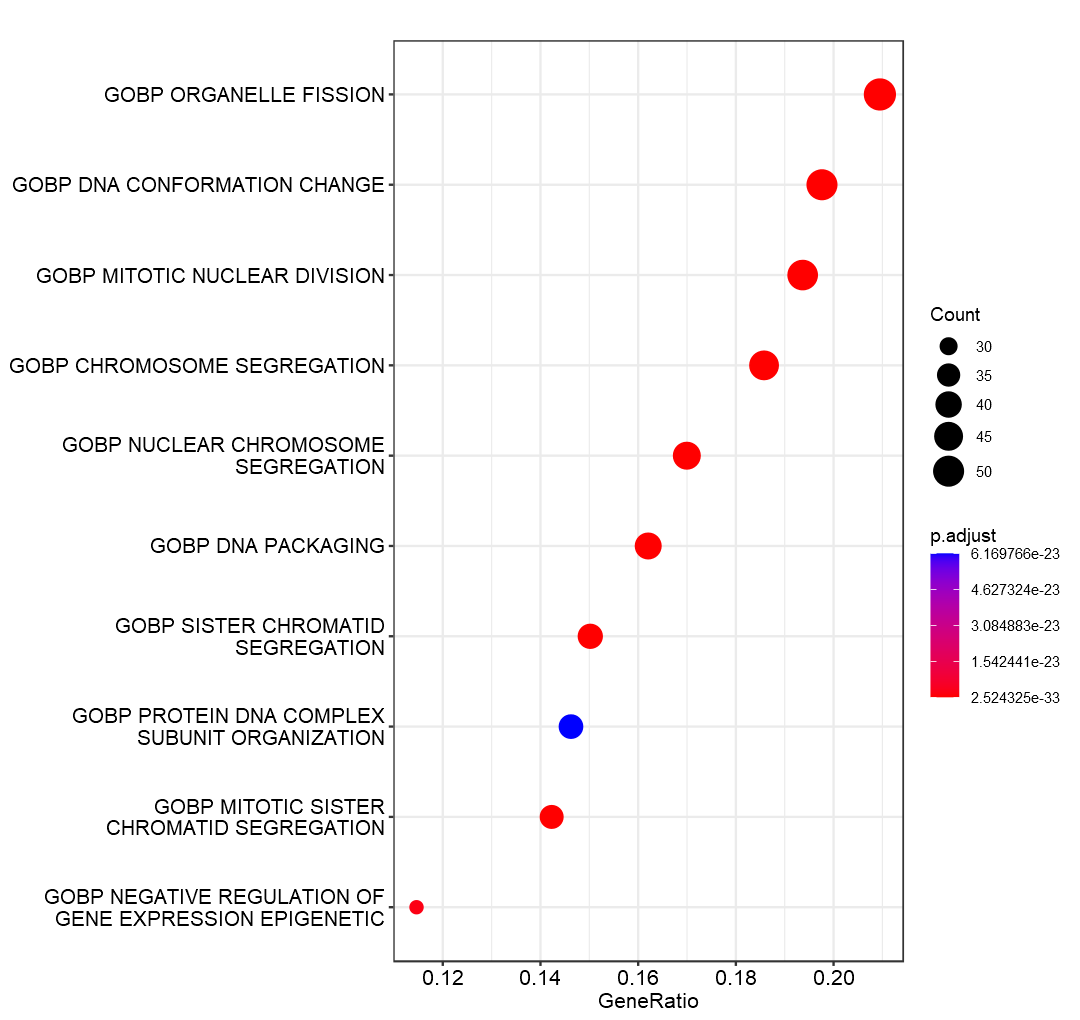

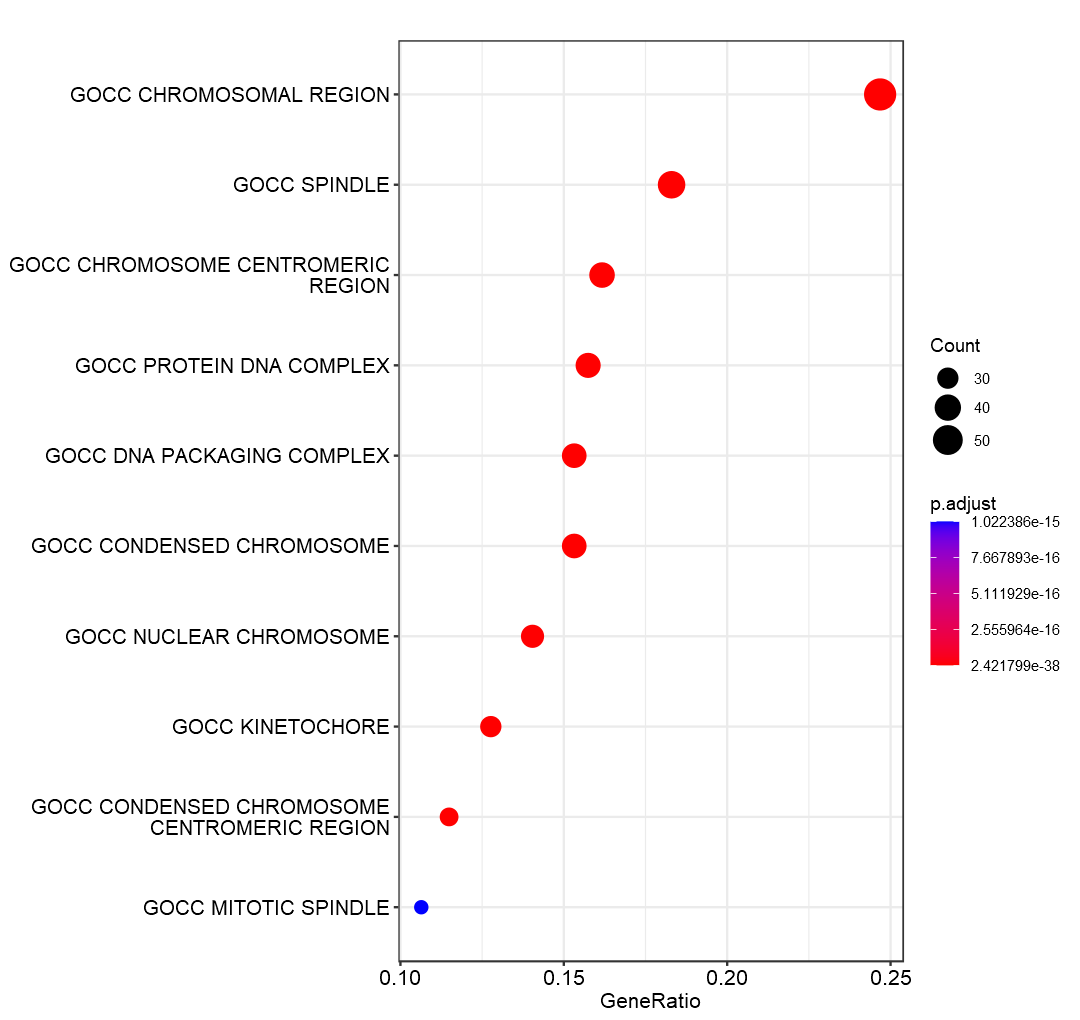

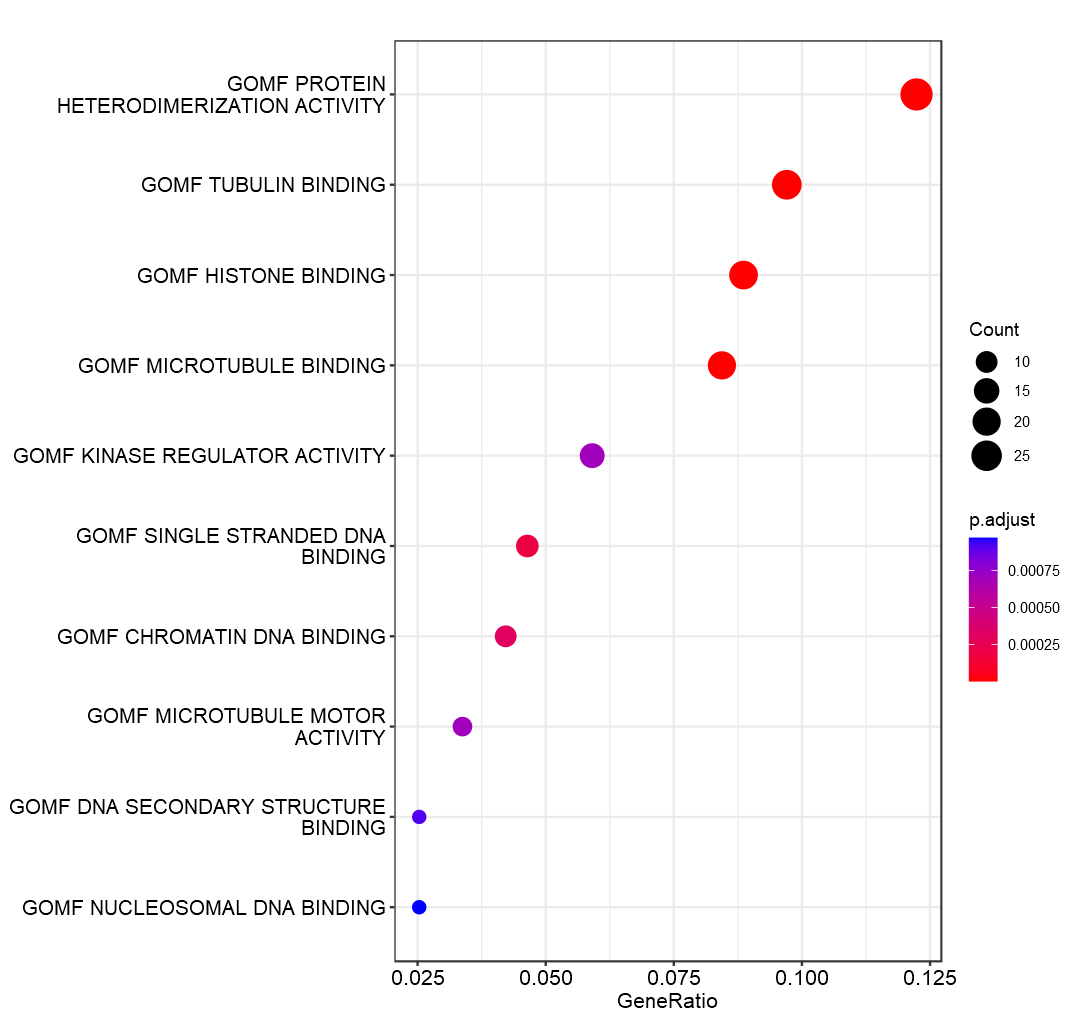

In [73]:
n_top_egmt <- 10
gg <- dotplot(em.bp, showCategory=n_top_egmt)
#gg <- dotplot(em, x = "GeneRatio",
#        color = "p.adjust", showCategory = n_top_egmt, split = "ONTOLOGY", font.size = 11,
#        title = "RNA Only Up") + facet_grid(ONTOLOGY~., scale="free")

print_figure(gg, width=9, height=8.5,
    file=sprintf("TGFB VS CX5461.dotplot.%s.enricher.go_top_BP%d", condstr, n_top_egmt))


gg <- dotplot(em.cc, showCategory=n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGFB VS CX5461.dotplot.%s.enricher.go_top_CC%d", condstr, n_top_egmt))

gg <- dotplot(em.mf, showCategory=n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGFB VS CX5461.dotplot.%s.enricher.go_top_MF%d", condstr, n_top_egmt))